## started 4pm , wed 27,july 2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

pd.set_option('display.max_columns', None)
import warnings 
warnings.filterwarnings('ignore')

import time
from dython.nominal import associations

In [2]:
from scipy import stats
from scipy.stats import skew, boxcox_normmax, norm
#from scipy.special import boxcox1

In [119]:
from sklearn.feature_extraction import DictVectorizer

In [3]:
# Display numerical correlations (pearson) between features on heatmap.
def correlation(train):
    sns.set(font_scale=1.1)
    correlation_train = train.corr()
    mask = np.triu(correlation_train.corr())
    plt.figure(figsize=(10, 10))
    sns.heatmap(correlation_train,
                annot=True,
                fmt='.1f',
                cmap='coolwarm',
                square=True,
                mask=mask,
                linewidths=1,
                cbar=False)

    plt.show()

In [4]:
def numeric_log_distribution_plot(df):
    """
     Description : Plot countplot for all categorical features 
    present in the dataframe passed
    
    Argument : Dataframe
    """
    nums_train = df.select_dtypes(exclude='object').columns
    for col in nums_train:
        print(df[col].describe())
        plt.rc("figure",figsize=(10,5))
        fig,axes = plt.subplots(1,2)
        plt.title("Distribution of "+col)
        sns.distplot(df[col].dropna(),ax=axes[0],axlabel='original',fit=stats.norm)
        sns.distplot(np.log1p(df[col].dropna()),ax=axes[1],axlabel='logged',fit=stats.norm)
        #sns.distplot(boxcox1p(df[col].dropna(), boxcox_normmax(df[col].dropna() + 1)),ax=axes[1],axlabel='boxcox',fit=scipy.stats.norm)
        #boxcox1p(features[i], boxcox_normmax(features[i] + 1))
        plt.tight_layout()
        plt.show()

In [56]:
def skewness(train):
    skew_df = pd.DataFrame(train.select_dtypes(np.number).columns, columns=['Feature'])
    skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: stats.skew(train[feature].dropna()))
    skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
    skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
    return skew_df.style.background_gradient(cmap='summer_r')

In [101]:
data.Career.corr(data.Year)

-0.14594577171827727

In [113]:
#def plot_lim_and_reg_plot():
def plot_lim_and_reg_plot(df,cols,target_col,fill_na,hue):
    df_def = df.copy()
    df_def = df_def.fillna(fill_na)

    for col in cols:
        print(col)
        correlation = df_def[target_col].corr(df_def[col])
        print("Correlation with Target  : ",correlation)
        plt.subplot(1, 2, 1)
        #the figure has 1 rows, 2 columns, and this plot is the first plot.
        #sns.relplot(x=col, y="SalePrice", data=df_def)
        sns.scatterplot(x=col, y=target_col, data=df_def,hue=hue)
        plt.title("Normal train Scatter")
        
        
        #plt.subplot(1, 2, 2)
        sns.lmplot(x=col, y=target_col, data=df_def,hue=hue)
        plt.title(" train lmplot")
        

        plt.tight_layout()
        plt.show()
        print()
        print()
        

In [121]:
def Dict_df(df,predictors):
    df = df.copy()
    
    dv_X = DictVectorizer(sparse=False)
    ds = df[predictors].to_dict(orient='records')
    dv_X.fit(ds)
    Xs = pd.DataFrame(dv_X.transform(ds))
    Xs.columns = dv_X.get_feature_names()
    return Xs

In [118]:
from sklearn.feature_selection import mutual_info_classif
def make_mi_scores_Classifier(X_train, y_train):
    # All discrete features should now have integer dtypes (double-check this before using MI!)
    discrete_features = X_train.dtypes == int
    mi_scores = mutual_info_classif(X_train, y_train, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_train.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.figure(figsize=(20,14))
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [151]:
def risk_ratio(train,columns,target):
    train2 = train.copy()
    global_departure = round((train2[target]==0).sum()/train2.shape[0],2)
    for col in columns:  
        print(col)
        print()
        table = pd.DataFrame()
        row_index = 0
        print(f' global departure = {global_departure*100} %')
        for gr_name , grp in train2.groupby(col):
            #display(grp.Churn)
            departure_rate = (grp[target] == 0).mean()
            risk_ratio =  departure_rate / global_departure
            table.loc[row_index,'feature'] = col+'_'+str(gr_name)
            table.loc[row_index,'departure_rate_%'] = np.round(departure_rate,2)*100
            table.loc[row_index,'risk_ratio_%'] = np.round((risk_ratio-1)*100,2)
            row_index +=1
        table.sort_values(by=['risk_ratio_%'],
                                ascending=False,
                                inplace=True)    
        display(table.style.background_gradient(cmap='summer_r'))
        print()

In [85]:
data = pd.read_csv('data/NBA_Rookies_1979_2020(greater than 2 seasons).csv')
print(data.shape)
data.head()

(2842, 41)


Unnamed: 0           Player Team  Year  Conf   Age  Career  Games      MP  \
0           0     James Bailey  SEA  1979  WEST  22.0     9.0   67.0   726.0   
1           1  Billy Ray Bates  POR  1980  WEST  23.0     4.0   16.0   235.0   
2           2      Larry Bird*  BOS  1979  EAST  23.0    13.0   82.0  2955.0   
3           3  Lawrence Boston  WSB  1980  EAST  23.0     1.0   13.0   125.0   
4           4   Dudley Bradley  IND  1979  EAST  22.0     9.0   82.0  2027.0   

      PTS     FG     FGA    FG%    3P    3PA    3P%     FT    FTA    FT%  \
0   312.0  122.0   271.0  0.450   0.0    0.0  0.000   68.0  101.0  0.673   
1   180.0   72.0   146.0  0.493   8.0   19.0  0.421   28.0   39.0  0.718   
2  1745.0  693.0  1463.0  0.474  58.0  143.0  0.406  301.0  360.0  0.836   
3    56.0   24.0    52.0  0.462   0.0    0.0  0.000    8.0   13.0  0.615   
4   688.0  275.0   609.0  0.452   2.0    5.0  0.400  136.0  174.0  0.782   

     ORB    DRB    TRB    AST    STL   BLK    TOV     PF   MPpg  PTSpg  FGpg  \
0   71.0  126.0  197.0   28.0   21.0  54.0   79.0  116.0  10.84    4.7  1.82   
1   13.0   16.0   29.0   31.0   14.0   2.0   20.0   26.0  14.69   11.3  4.50   
2  216.0  636.0  852.0  370.0  143.0  53.0  263.0  279.0  36.04   21.3  8.45   
3   19.0   20.0   39.0    2.0    4.0   2.0    8.0   25.0   9.62    4.3  1.85   
4   69.0  154.0  223.0  252.0  211.0  48.0  166.0  194.0  24.72    8.4  3.35   

   3Ppg  FTpg  ORBpg  DRBpg  TRBpg  ASTpg  STLpg  BLKpg  TOVpg  PFpg  Target  
0  0.00  1.01   1.06   1.88    2.9    0.4   0.31   0.81   1.18  1.73       1  
1  0.50  1.75   0.81   1.00    1.8    1.9   0.88   0.12   1.25  1.62       1  
2  0.71  3.67   2.63   7.76   10.4    4.5   1.74   0.65   3.21  3.40       1  
3  0.00  0.62   1.46   1.54    3.0    0.2   0.31   0.15   0.62  1.92       0  
4  0.02  1.66   0.84   1.88    2.7    3.1   2.57   0.59   2.02  2.37       1

In [86]:
team_map ={
    'NOK':'NOP',#pelicans
    'SDC':'LAC',# clippers
    #'NOP':'NOP',#pelicans
    'CHO':'CHH', #hornets
    'KCK':'SAC', # kings
    'VAN':'MEM', # grizzs
    'NOH':'NOP', # pelicans
    #'BRK':'BRK', # Nets
    'CHA':'CHH', # hornets
    #'OKC':'OKC', # okc
    'WAS':'WSH', #wizards
    #'TOR':'TOR', # raptors
    'WSB':'WSH', # wizards
    'SEA':'OKC', # sonics now okc
    'NJN':'BRK',#nets
    
}

In [87]:
for old_team, new_team in team_map.items():
    data['Team'].replace(old_team, new_team, inplace=True)

In [29]:
data.Year.max()

2019

In [43]:
data[(data.Year==2017)].shape

(106, 44)

In [44]:
data[(data.Year==2017) & (data.Career>=5)]#.tail(20)

Unnamed: 0             Player Team  Year  Conf   Age  Career  Games  \
2543        2543         Quinn Cook  DAL  2017  WEST  23.0     5.0   14.0   
2586        2586        David Nwaba  LAL  2017  WEST  24.0     6.0   20.0   
2590        2590     Gary Payton II  MIL  2017  EAST  24.0     6.0    6.0   
2617        2617        Bam Adebayo  MIA  2017  EAST  20.0     5.0   69.0   
2618        2618      Jarrett Allen  BRK  2017  EAST  19.0     5.0   72.0   
2621        2621         OG Anunoby  TOR  2017  EAST  20.0     5.0   74.0   
2625        2625         Lonzo Ball  LAL  2017  WEST  20.0     5.0   52.0   
2626        2626        Jordan Bell  GSW  2017  WEST  23.0     5.0   57.0   
2627        2627         Khem Birch  ORL  2017  EAST  25.0     5.0   42.0   
2630        2630  Bogdan Bogdanović  SAC  2017  WEST  25.0     5.0   78.0   
2632        2632       Tony Bradley  UTA  2017  WEST  20.0     5.0    9.0   
2633        2633      Dillon Brooks  MEM  2017  WEST  22.0     5.0   82.0   
2634        2634     Sterling Brown  MIL  2017  EAST  22.0     5.0   54.0   
2635        2635      Thomas Bryant  LAL  2017  WEST  20.0     5.0   15.0   
2636        2636        Alex Caruso  LAL  2017  WEST  23.0     5.0   37.0   
2640        2640       John Collins  ATL  2017  EAST  20.0     5.0   74.0   
2645        2645       Torrey Craig  DEN  2017  WEST  27.0     5.0   39.0   
2647        2647     Damyean Dotson  NYK  2017  EAST  23.0     5.0   44.0   
2652        2652       De'Aaron Fox  SAC  2017  WEST  20.0     5.0   73.0   
2657        2657          Josh Hart  LAL  2017  WEST  22.0     5.0   63.0   
2666        2666         Wes Iwundu  ORL  2017  EAST  23.0     5.0   62.0   
2668        2668       Josh Jackson  PHO  2017  WEST  20.0     5.0   77.0   
2669        2669     Justin Jackson  SAC  2017  WEST  22.0     5.0   68.0   
2674        2674       Luke Kennard  DET  2017  EAST  21.0     5.0   73.0   
2675        2675        Maxi Kleber  DAL  2017  WEST  26.0     5.0   72.0   
2676        2676     Furkan Korkmaz  PHI  2017  EAST  20.0     5.0   14.0   
2678        2678         Kyle Kuzma  LAL  2017  WEST  22.0     5.0   77.0   
2684        2684    Lauri Markkanen  CHI  2017  EAST  20.0     5.0   68.0   
2689        2689   Alfonzo McKinnie  TOR  2017  EAST  25.0     5.0   14.0   
2691        2691   Donovan Mitchell  UTA  2017  WEST  21.0     5.0   79.0   
2693        2693         Malik Monk  CHO  2017  EAST  19.0     5.0   63.0   
2696        2696       Monte Morris  DEN  2017  WEST  22.0     5.0    3.0   
2698        2698        Abdel Nader  BOS  2017  EAST  24.0     5.0   48.0   
2699        2699    Frank Ntilikina  NYK  2017  EAST  19.0     5.0   78.0   
2700        2700      Royce O'Neale  UTA  2017  WEST  24.0     5.0   69.0   
2701        2701       Semi Ojeleye  BOS  2017  EAST  23.0     5.0   73.0   
2702        2702         Cedi Osman  CLE  2017  EAST  22.0     5.0   61.0   
2717        2717   Dennis Smith Jr.  DAL  2017  WEST  20.0     5.0   69.0   
2720        2720       Jayson Tatum  BOS  2017  EAST  19.0     5.0   80.0   
2722        2722       Daniel Theis  BOS  2017  EAST  25.0     5.0   63.0   
2729        2729      Derrick White  SAS  2017  WEST  23.0     5.0   17.0   
2733        2733        D.J. Wilson  MIL  2017  EAST  21.0     5.0   22.0   

          MP     PTS     FG     FGA    FG%     3P    3PA    3P%     FT    FTA  \
2543   188.0    79.0   33.0    66.0  0.500   11.0   26.0  0.423    2.0    5.0   
2586   397.0   120.0   47.0    81.0  0.580    1.0    5.0  0.200   25.0   39.0   
2590    99.0    20.0    8.0    22.0  0.364    1.0    9.0  0.111    3.0    5.0   
2617  1368.0   477.0  174.0   340.0  0.512    0.0    7.0  0.000  129.0  179.0   
2618  1441.0   587.0  234.0   397.0  0.589    5.0   15.0  0.333  114.0  147.0   
2621  1481.0   438.0  163.0   346.0  0.471   73.0  197.0  0.371   39.0   62.0   
2625  1780.0   528.0  203.0   564.0  0.360   90.0  295.0  0.305   32.0   71.0   
2626   809.0   262.0  116.0   185.0  0.627    

In [89]:
data['Team'].nunique()

30

In [90]:
data.rename(columns = {'Target':'target>=2'}, inplace = True)

In [91]:
data['target>=3'] = data.apply(lambda x : 1 if x.Career >=3  else 0 ,axis=1)
data['target>=4'] = data.apply(lambda x : 1 if x.Career >=4  else 0 ,axis=1)
data['target>=5'] = data.apply(lambda x : 1 if x.Career >=5  else 0 ,axis=1)

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2842 entries, 0 to 2841
Data columns (total 44 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2842 non-null   int64  
 1   Player      2842 non-null   object 
 2   Team        2842 non-null   object 
 3   Year        2842 non-null   int64  
 4   Conf        2842 non-null   object 
 5   Age         2842 non-null   float64
 6   Career      2842 non-null   float64
 7   Games       2842 non-null   float64
 8   MP          2842 non-null   float64
 9   PTS         2842 non-null   float64
 10  FG          2842 non-null   float64
 11  FGA         2842 non-null   float64
 12  FG%         2842 non-null   float64
 13  3P          2842 non-null   float64
 14  3PA         2842 non-null   float64
 15  3P%         2842 non-null   float64
 16  FT          2842 non-null   float64
 17  FTA         2842 non-null   float64
 18  FT%         2842 non-null   float64
 19  ORB         2842 non-null  

In [18]:
data.head()

Unnamed: 0           Player Team  Year  Conf   Age  Career  Games      MP  \
0           0     James Bailey  SEA  1979  WEST  22.0     9.0   67.0   726.0   
1           1  Billy Ray Bates  POR  1980  WEST  23.0     4.0   16.0   235.0   
2           2      Larry Bird*  BOS  1979  EAST  23.0    13.0   82.0  2955.0   
3           3  Lawrence Boston  WSB  1980  EAST  23.0     1.0   13.0   125.0   
4           4   Dudley Bradley  IND  1979  EAST  22.0     9.0   82.0  2027.0   

      PTS     FG     FGA    FG%    3P    3PA    3P%     FT    FTA    FT%  \
0   312.0  122.0   271.0  0.450   0.0    0.0  0.000   68.0  101.0  0.673   
1   180.0   72.0   146.0  0.493   8.0   19.0  0.421   28.0   39.0  0.718   
2  1745.0  693.0  1463.0  0.474  58.0  143.0  0.406  301.0  360.0  0.836   
3    56.0   24.0    52.0  0.462   0.0    0.0  0.000    8.0   13.0  0.615   
4   688.0  275.0   609.0  0.452   2.0    5.0  0.400  136.0  174.0  0.782   

     ORB    DRB    TRB    AST    STL   BLK    TOV     PF   MPpg  PTSpg  FGpg  \
0   71.0  126.0  197.0   28.0   21.0  54.0   79.0  116.0  10.84    4.7  1.82   
1   13.0   16.0   29.0   31.0   14.0   2.0   20.0   26.0  14.69   11.3  4.50   
2  216.0  636.0  852.0  370.0  143.0  53.0  263.0  279.0  36.04   21.3  8.45   
3   19.0   20.0   39.0    2.0    4.0   2.0    8.0   25.0   9.62    4.3  1.85   
4   69.0  154.0  223.0  252.0  211.0  48.0  166.0  194.0  24.72    8.4  3.35   

   3Ppg  FTpg  ORBpg  DRBpg  TRBpg  ASTpg  STLpg  BLKpg  TOVpg  PFpg  \
0  0.00  1.01   1.06   1.88    2.9    0.4   0.31   0.81   1.18  1.73   
1  0.50  1.75   0.81   1.00    1.8    1.9   0.88   0.12   1.25  1.62   
2  0.71  3.67   2.63   7.76   10.4    4.5   1.74   0.65   3.21  3.40   
3  0.00  0.62   1.46   1.54    3.0    0.2   0.31   0.15   0.62  1.92   
4  0.02  1.66   0.84   1.88    2.7    3.1   2.57   0.59   2.02  2.37   

   target>=2  target>=3  target>=4  target>=5  
0          1          1          1          1  
1          1          1          1          0  
2          1          1          1          1  
3          0          0          0          0  
4          1          1          1          1

In [93]:
train = data[data.Year<=2017]

In [47]:
train

Unnamed: 0              Player Team  Year  Conf   Age  Career  Games  \
0              0        James Bailey  SEA  1979  WEST  22.0     9.0   67.0   
1              1     Billy Ray Bates  POR  1980  WEST  23.0     4.0   16.0   
2              2         Larry Bird*  BOS  1979  EAST  23.0    13.0   82.0   
3              3     Lawrence Boston  WSB  1980  EAST  23.0     1.0   13.0   
4              4      Dudley Bradley  IND  1979  EAST  22.0     9.0   82.0   
...          ...                 ...  ...   ...   ...   ...     ...    ...   
2732        2732       Matt Williams  MIA  2017  EAST  24.0     1.0    3.0   
2733        2733         D.J. Wilson  MIL  2017  EAST  21.0     5.0   22.0   
2734        2734        Jamil Wilson  LAC  2017  WEST  27.0     1.0   15.0   
2735        2735  Guerschon Yabusele  BOS  2017  EAST  22.0     2.0   33.0   
2736        2736          Ante Žižić  CLE  2017  EAST  21.0     3.0   32.0   

          MP     PTS     FG     FGA    FG%    3P    3PA    3P%     FT    FTA  \
0      726.0   312.0  122.0   271.0  0.450   0.0    0.0  0.000   68.0  101.0   
1      235.0   180.0   72.0   146.0  0.493   8.0   19.0  0.421   28.0   39.0   
2     2955.0  1745.0  693.0  1463.0  0.474  58.0  143.0  0.406  301.0  360.0   
3      125.0    56.0   24.0    52.0  0.462   0.0    0.0  0.000    8.0   13.0   
4     2027.0   688.0  275.0   609.0  0.452   2.0    5.0  0.400  136.0  174.0   
...      ...     ...    ...     ...    ...   ...    ...    ...    ...    ...   
2732    11.0     5.0    2.0     6.0  0.333   1.0    5.0  0.200    0.0    0.0   
2733    71.0    21.0    9.0    16.0  0.563   2.0    5.0  0.400    1.0    2.0   
2734   274.0   105.0   38.0    81.0  0.469  27.0   63.0  0.429    2.0    4.0   
2735   235.0    79.0   26.0    61.0  0.426  12.0   37.0  0.324   15.0   22.0   
2736   214.0   119.0   49.0    67.0  0.731   0.0    0.0  0.000   21.0   29.0   

        FT%    ORB    DRB    TRB    AST    STL   BLK    TOV     PF   MPpg  \
0     0.673   71.0  126.0  197.0   28.0   21.0  54.0   79.0  116.0  10.84   
1     0.718   13.0   16.0   29.0   31.0   14.0   2.0   20.0   26.0  14.69   
2     0.836  216.0  636.0  852.0  370.0  143.0  53.0  263.0  279.0  36.04   
3     0.615   19.0   20.0   39.0    2.0    4.0   2.0    8.0   25.0   9.62   
4     0.782   69.0  154.0  223.0  252.0  211.0  48.0  166.0  194.0  24.72   
...     ...    ...    ...    ...    ...    ...   ...    ...    ...    ...   
2732  0.000    0.0    1.0    1.0    0.0    0.0   0.0    1.0    1.0   3.67   
2733  0.500    2.0    8.0   10.0    3.0    3.0   1.0    4.0    7.0   3.23   
2734  0.500    3.0   29.0   32.0   10.0    5.0   8.0    8.0   34.0  18.27   
2735  0.682   17.0   35.0   52.0   16.0    4.0   5.0   12.0   23.0   7.12   
2736  0.724   24.0   36.0   60.0    5.0    2.0  13.0   11.0   30.0   6.69   

      PTSpg  FGpg  3Ppg  FTpg  ORBpg  DRBpg  TRBpg  ASTpg  STLpg  BLKpg  \
0       4.7  1.82  0.00  1.01   1.06   1.88    2.9    0.4   0.31   0.81   
1      11.3  4.50  0.50  1.75   0.81   1.00    1.8    1.9   0.88   0.12   
2      21.3  8.45  0.71  3.67   2.63   7.76   10.4    4.5   1.74   0.65   
3       4.3  1.85  0.00  0.62   1.46   1.54    3.0    0.2   0.31   0.15   
4       8.4  3.35  0.02  1.66   0.84   1.88    2.7    3.1   2.57   0.59   
...     ...   ...   ...   ...    ...    ...    ...    ...    ...    ...   
2732    1.7  0.67  0.33  0.00   0.00   0.33    0.3    0.0   0.00   0.00   
2733    1.0  0.41  0.09  0.05   0.09   0.36    0.5    0.1   0.14   0.05   
2734    7.0  2.53  1.80  0.13   0.20   1.93    2.1    0.7   0.33   0.53   
2735    2.4  0.79  0.36  0.45   0.52   1.06    1.6    0.5   0.12   0.15   
2736    3.7  1.53  0.00  0.66   0.75   1.12    1.9    0.2   0.06   0.41   

      TOVpg  PFpg  target>=2  target>=3  target>=4  target>=5  
0      1.18  1.73          1          1          1          1  
1      1.25  1.62          1          1          1          0  
2      3.21  3.40          1          1          1          1  
3      0.62  1.92         

In [19]:
cats = 'Team	Year	Conf	Career'.split('	')
cats

['Team', 'Year', 'Conf', 'Career']

In [21]:
nums ='Age	Games	MP	PTS	FG	FGA	FG%	3P	3PA	3P%	FT	FTA	FT%	ORB	DRB	TRB	AST	STL	BLK	TOV	PF	MPpg	PTSpg	FGpg	3Ppg	FTpg	ORBpg	DRBpg	TRBpg	ASTpg	STLpg	BLKpg	TOVpg	PFpg'.split('	')
nums

['Age',
 'Games',
 'MP',
 'PTS',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'MPpg',
 'PTSpg',
 'FGpg',
 '3Ppg',
 'FTpg',
 'ORBpg',
 'DRBpg',
 'TRBpg',
 'ASTpg',
 'STLpg',
 'BLKpg',
 'TOVpg',
 'PFpg']

In [22]:
targets = 'target>=2	target>=3	target>=4	target>=5'.split('	')
targets

['target>=2', 'target>=3', 'target>=4', 'target>=5']

# <span style="color:blue">Histogram</span>

count    2842.000000
mean       22.681210
std         1.955432
min        18.000000
25%        22.000000
50%        23.000000
75%        23.000000
max        35.000000
Name: Age, dtype: float64


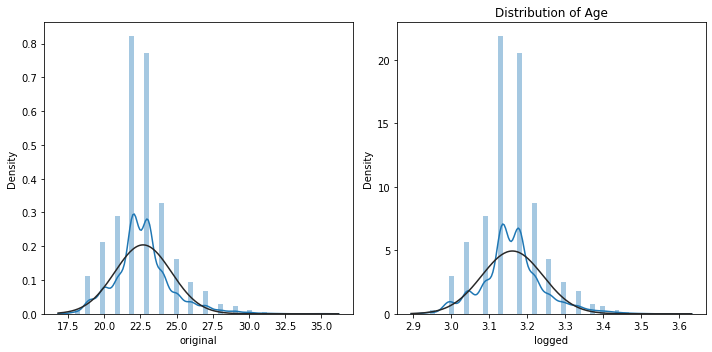

count    2842.000000
mean       41.989444
std        27.094875
min         1.000000
25%        16.000000
50%        42.000000
75%        68.000000
max        82.000000
Name: Games, dtype: float64


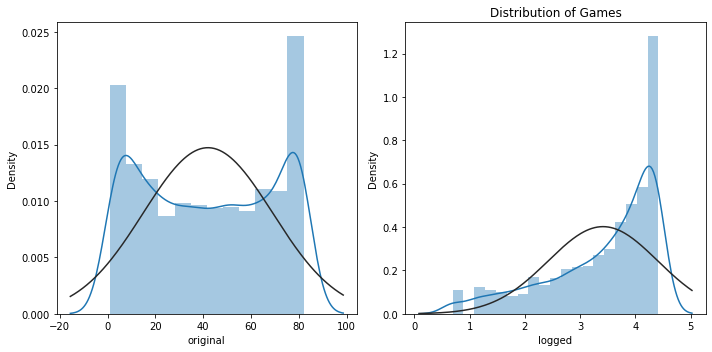

count    2842.000000
mean      738.082336
std       760.123906
min         0.000000
25%       119.000000
50%       451.000000
75%      1186.000000
max      3249.000000
Name: MP, dtype: float64


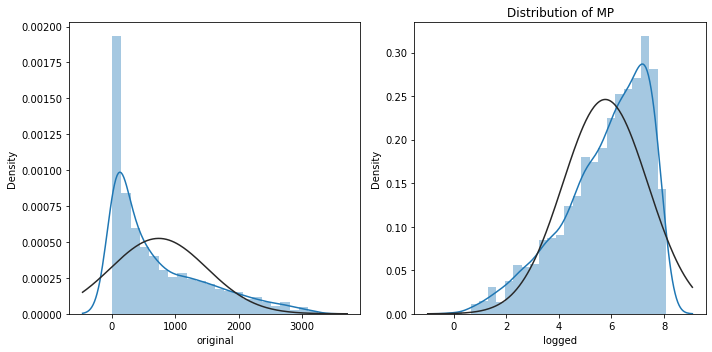

count    2842.000000
mean      284.954961
std       343.667506
min         0.000000
25%        37.000000
50%       150.000000
75%       423.500000
max      2313.000000
Name: PTS, dtype: float64


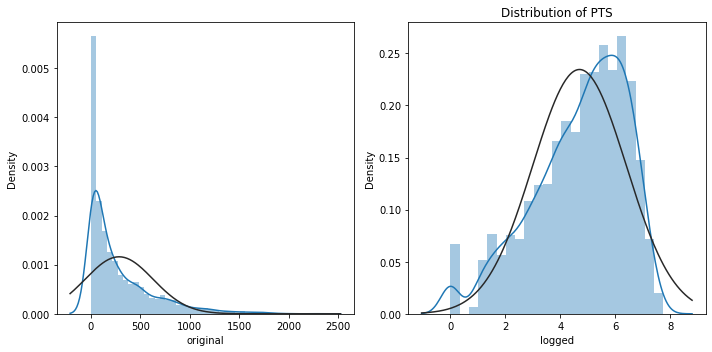

count    2842.000000
mean      109.711471
std       132.461115
min         0.000000
25%        14.000000
50%        56.500000
75%       160.750000
max       837.000000
Name: FG, dtype: float64


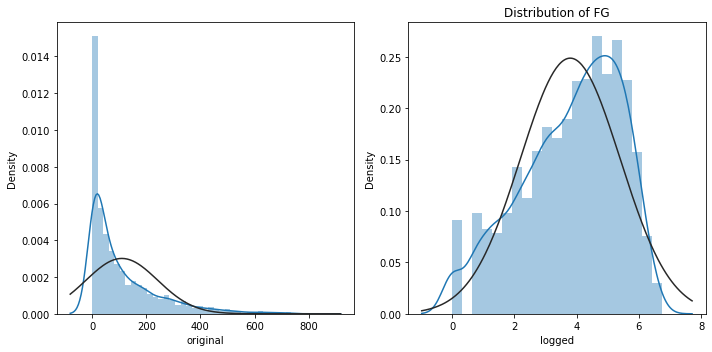

count    2842.000000
mean      245.313160
std       285.433924
min         0.000000
25%        37.000000
50%       133.500000
75%       364.750000
max      1625.000000
Name: FGA, dtype: float64


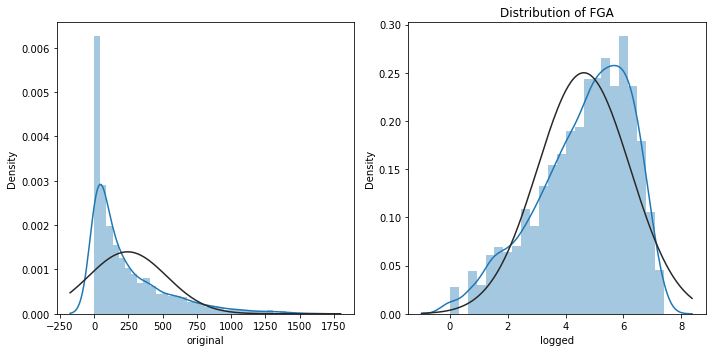

count    2842.000000
mean        0.415903
std         0.123433
min         0.000000
25%         0.370000
50%         0.425000
75%         0.475000
max         1.000000
Name: FG%, dtype: float64


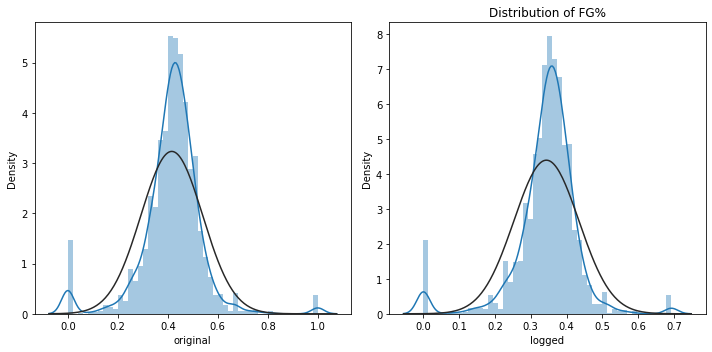

count    2842.000000
mean       11.781844
std        24.595372
min         0.000000
25%         0.000000
50%         1.000000
75%        10.000000
max       187.000000
Name: 3P, dtype: float64


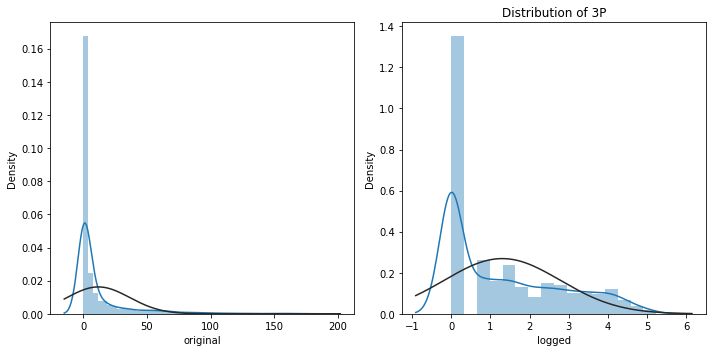

count    2842.000000
mean       36.409571
std        68.896929
min         0.000000
25%         1.000000
50%         6.000000
75%        35.750000
max       550.000000
Name: 3PA, dtype: float64


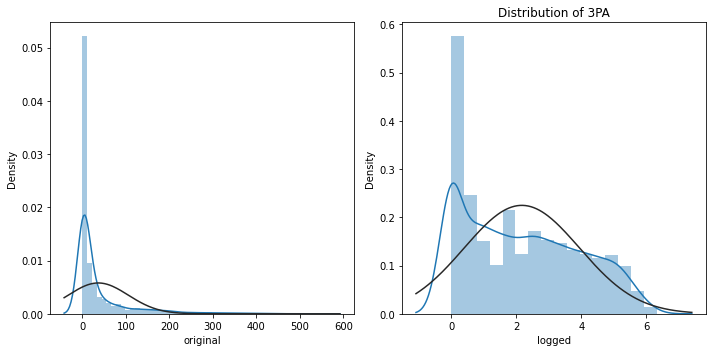

count    2842.000000
mean        0.173293
std         0.185074
min         0.000000
25%         0.000000
50%         0.167000
75%         0.319000
max         1.000000
Name: 3P%, dtype: float64


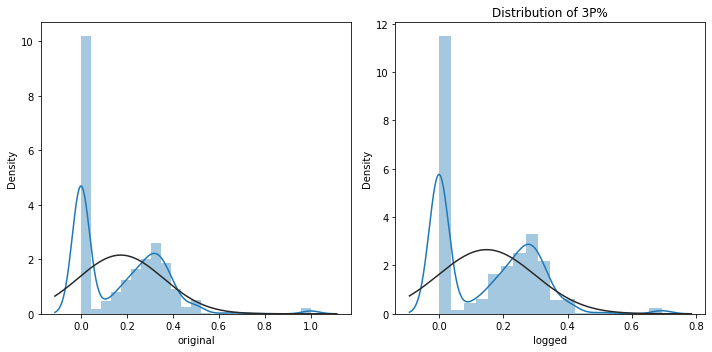

count    2842.000000
mean       53.750176
std        71.917315
min         0.000000
25%         6.000000
50%        26.000000
75%        73.000000
max       630.000000
Name: FT, dtype: float64


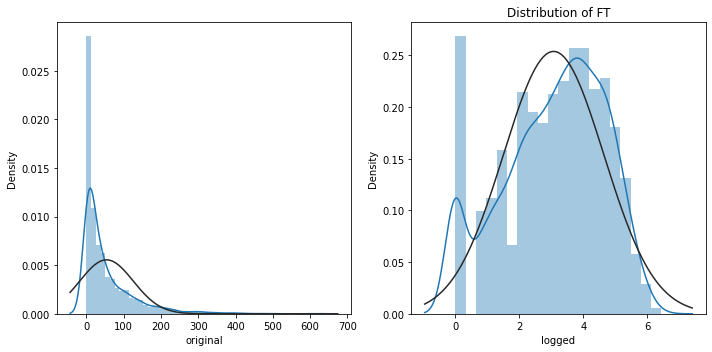

count    2842.000000
mean       75.331105
std        97.666482
min         0.000000
25%        10.000000
50%        38.500000
75%       104.000000
max       837.000000
Name: FTA, dtype: float64


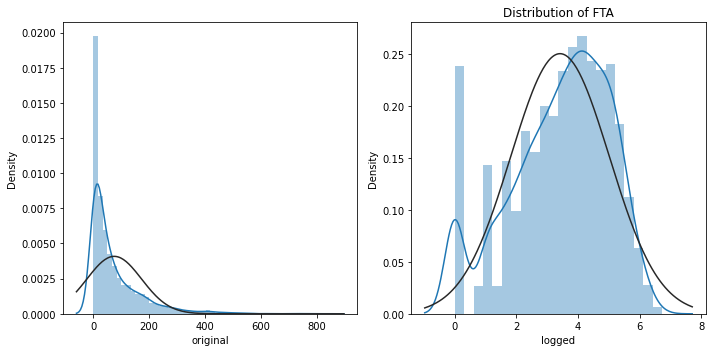

count    2842.000000
mean        0.634274
std         0.237162
min         0.000000
25%         0.571000
50%         0.692000
75%         0.774000
max         1.000000
Name: FT%, dtype: float64


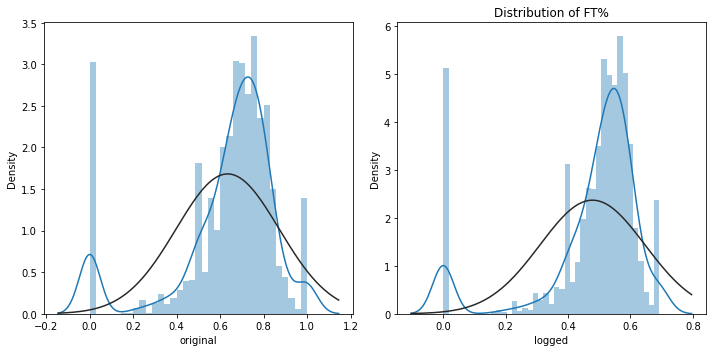

count    2842.000000
mean       42.070725
std        55.441604
min         0.000000
25%         5.000000
50%        21.000000
75%        56.000000
max       440.000000
Name: ORB, dtype: float64


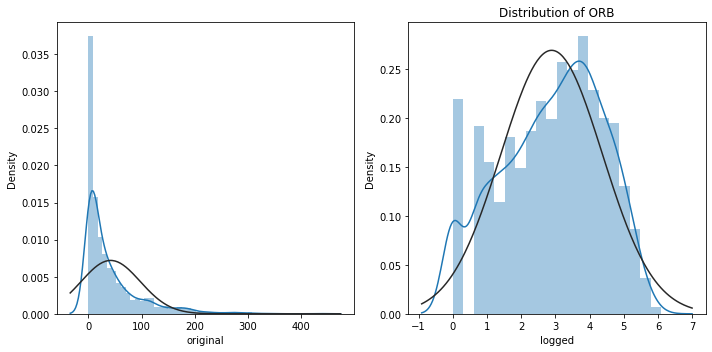

count    2842.000000
mean       87.424349
std       106.506494
min         0.000000
25%        13.000000
50%        44.000000
75%       126.000000
max       780.000000
Name: DRB, dtype: float64


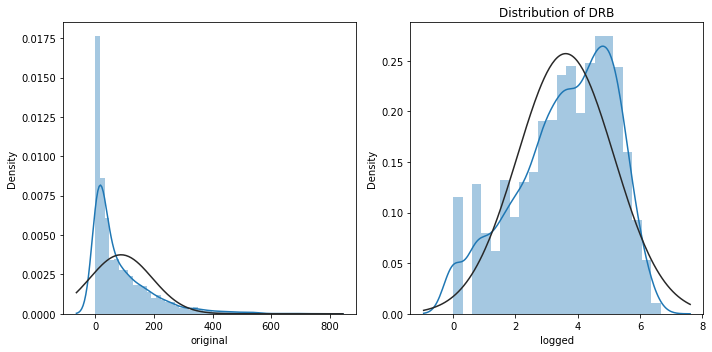

count    2842.000000
mean      129.495074
std       158.367570
min         0.000000
25%        19.000000
50%        68.000000
75%       184.750000
max      1122.000000
Name: TRB, dtype: float64


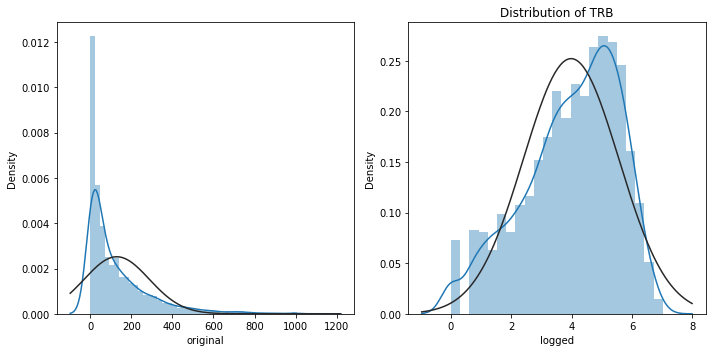

count    2842.000000
mean       63.757917
std        96.651130
min         0.000000
25%         6.000000
50%        26.000000
75%        79.000000
max       868.000000
Name: AST, dtype: float64


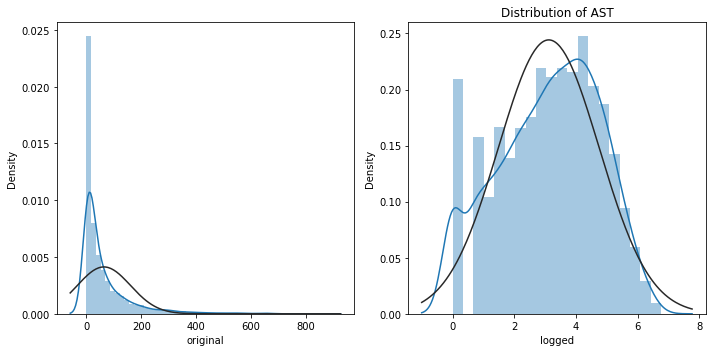

count    2842.000000
mean       25.361013
std        30.763404
min         0.000000
25%         3.000000
50%        14.000000
75%        37.000000
max       211.000000
Name: STL, dtype: float64


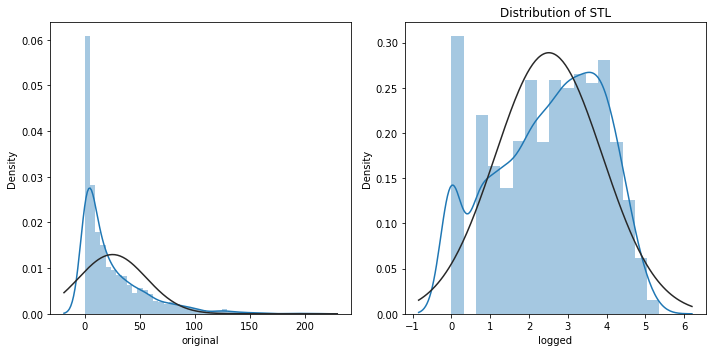

count    2842.000000
mean       16.234342
std        28.873816
min         0.000000
25%         1.000000
50%         6.000000
75%        18.000000
max       397.000000
Name: BLK, dtype: float64


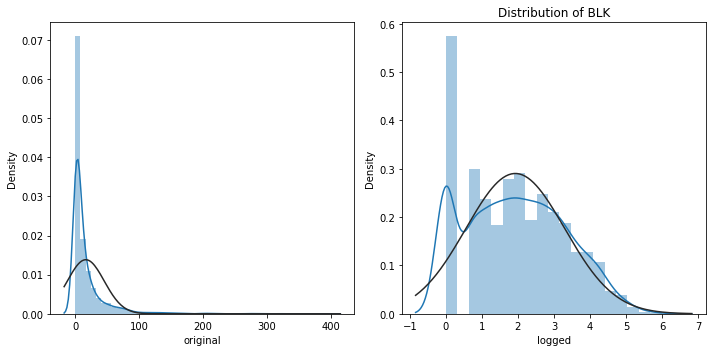

count    2842.000000
mean       49.555947
std        57.750405
min         0.000000
25%         8.000000
50%        28.000000
75%        73.000000
max       345.000000
Name: TOV, dtype: float64


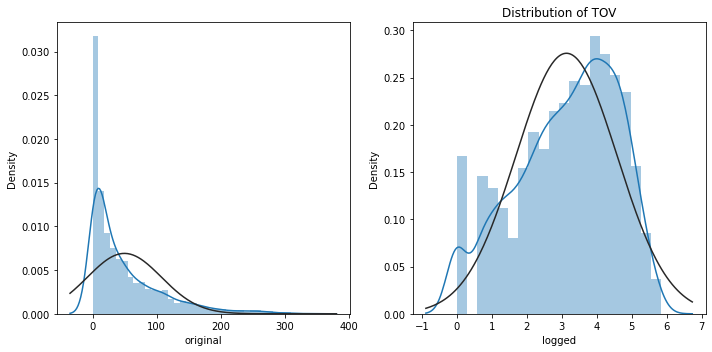

count    2842.000000
mean       79.185785
std        77.022010
min         0.000000
25%        14.000000
50%        54.000000
75%       128.000000
max       372.000000
Name: PF, dtype: float64


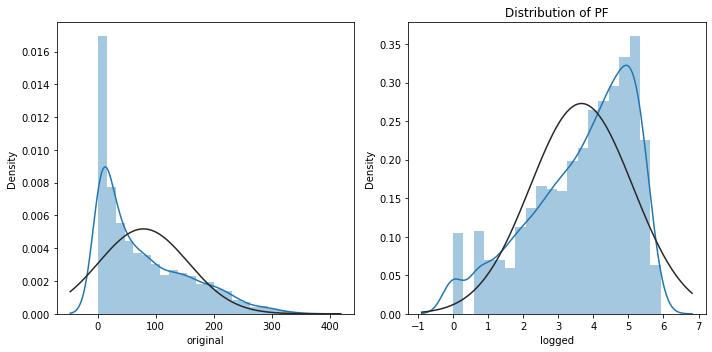

count    2842.000000
mean       13.741063
std         8.530267
min         0.000000
25%         7.000000
50%        11.765000
75%        18.890000
max        40.930000
Name: MPpg, dtype: float64


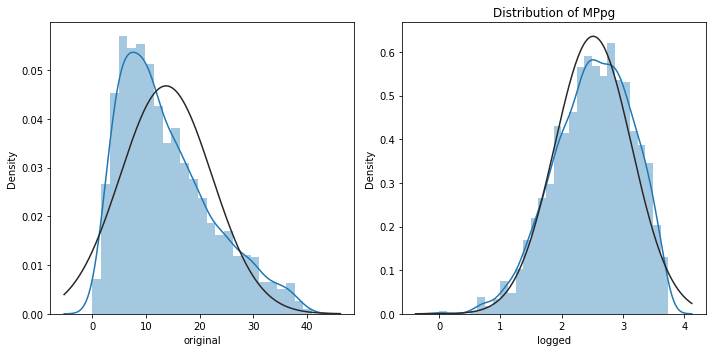

count    2842.000000
mean        5.083849
std         4.110754
min         0.000000
25%         2.200000
50%         3.900000
75%         6.700000
max        28.200000
Name: PTSpg, dtype: float64


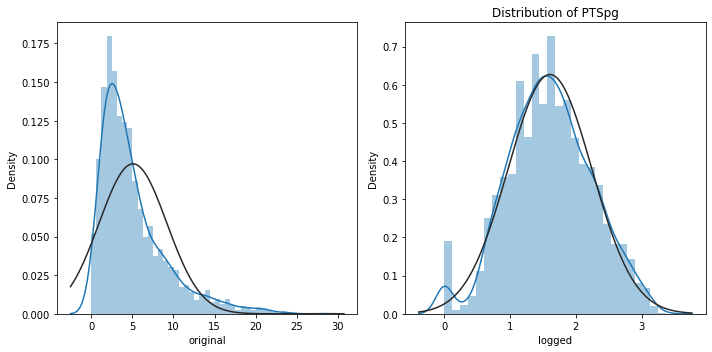

count    2842.000000
mean        1.952956
std         1.586865
min         0.000000
25%         0.850000
50%         1.500000
75%         2.570000
max        10.210000
Name: FGpg, dtype: float64


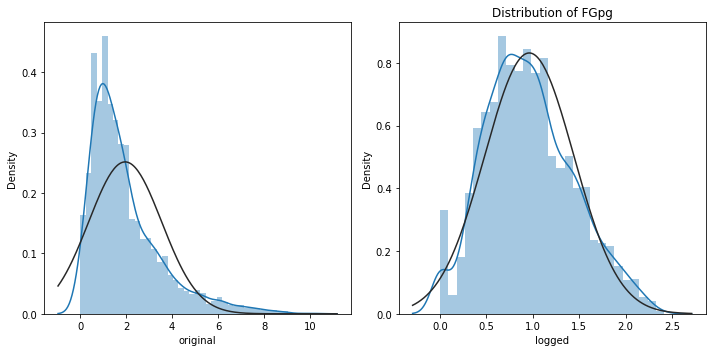

count    2842.000000
mean        0.225524
std         0.374323
min         0.000000
25%         0.000000
50%         0.030000
75%         0.310000
max         2.500000
Name: 3Ppg, dtype: float64


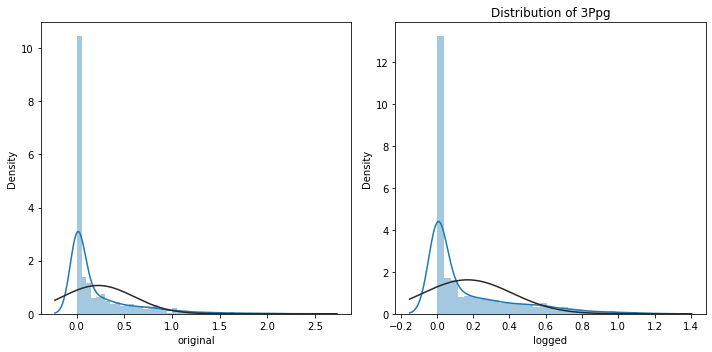

count    2842.000000
mean        0.950517
std         0.905135
min         0.000000
25%         0.360000
50%         0.710000
75%         1.250000
max         7.680000
Name: FTpg, dtype: float64


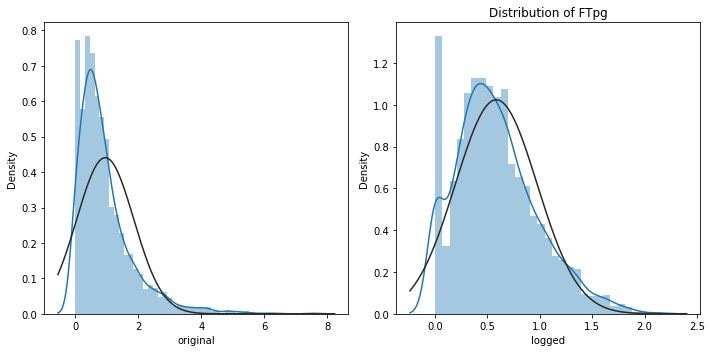

count    2842.000000
mean        0.779785
std         0.710567
min         0.000000
25%         0.280000
50%         0.580000
75%         1.070000
max         5.370000
Name: ORBpg, dtype: float64


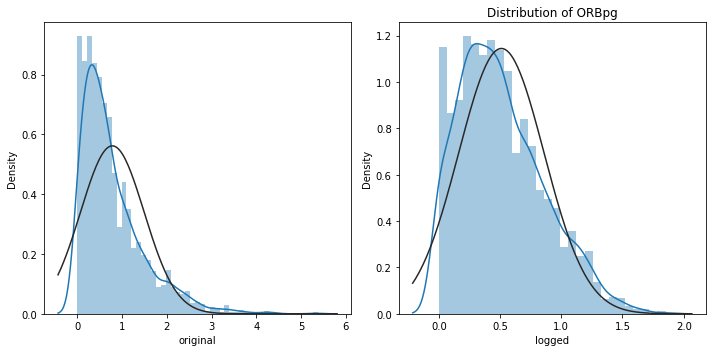

count    2842.000000
mean        1.600165
std         1.296685
min         0.000000
25%         0.690000
50%         1.250000
75%         2.140000
max         9.630000
Name: DRBpg, dtype: float64


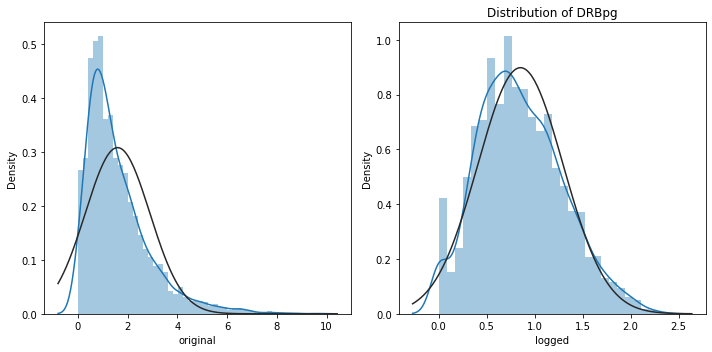

count    2842.000000
mean        2.381809
std         1.921023
min         0.000000
25%         1.000000
50%         1.800000
75%         3.200000
max        13.900000
Name: TRBpg, dtype: float64


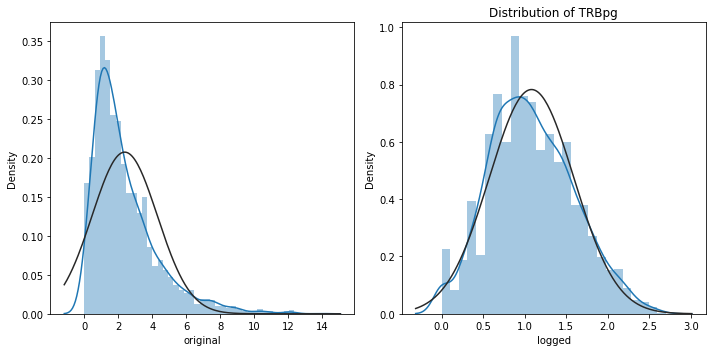

count    2842.000000
mean        1.138213
std         1.284463
min         0.000000
25%         0.300000
50%         0.700000
75%         1.500000
max        10.600000
Name: ASTpg, dtype: float64


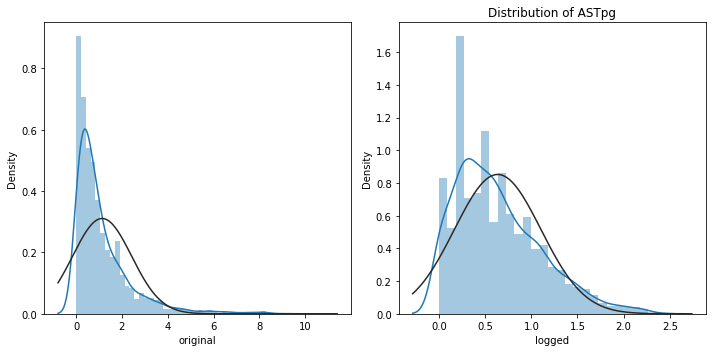

count    2842.000000
mean        0.467882
std         0.396020
min         0.000000
25%         0.192500
50%         0.370000
75%         0.640000
max         2.570000
Name: STLpg, dtype: float64


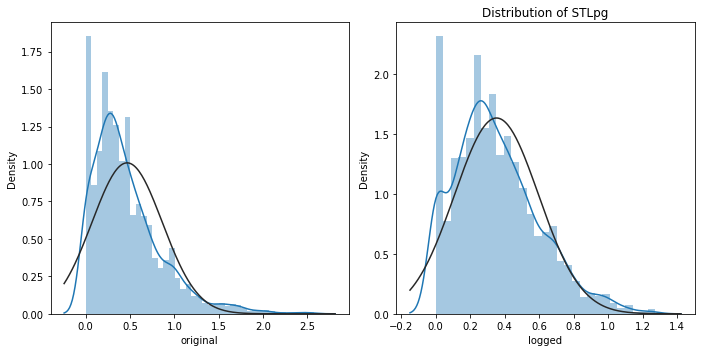

count    2842.000000
mean        0.290250
std         0.397396
min         0.000000
25%         0.050000
50%         0.170000
75%         0.380000
max         4.960000
Name: BLKpg, dtype: float64


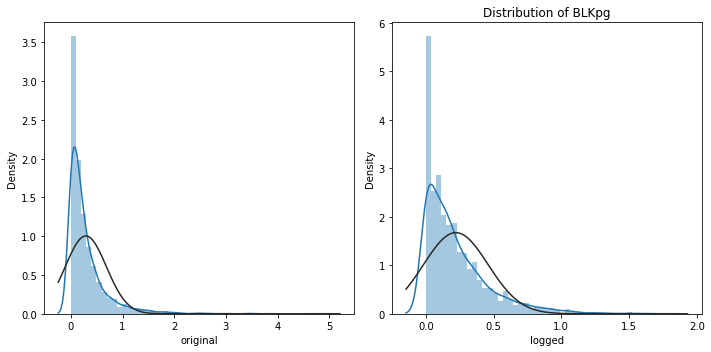

count    2842.000000
mean        0.915922
std         0.696778
min         0.000000
25%         0.440000
50%         0.750000
75%         1.200000
max         4.430000
Name: TOVpg, dtype: float64


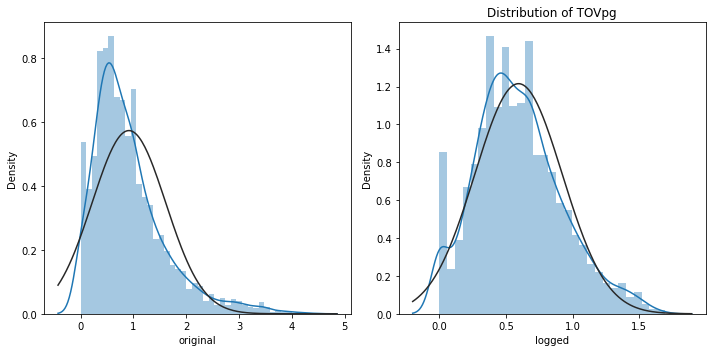

count    2842.000000
mean        1.526545
std         0.878381
min         0.000000
25%         0.870000
50%         1.410000
75%         2.110000
max         5.000000
Name: PFpg, dtype: float64


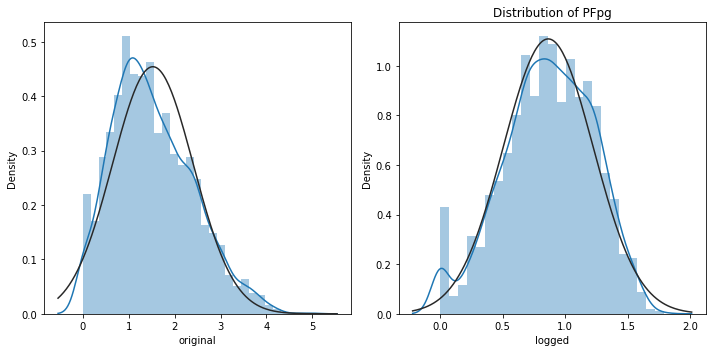

In [23]:
numeric_log_distribution_plot(df=data[nums])

In [48]:
for target in targets:
    print(target)
    display(train[target].value_counts(normalize=True))
    print('=============================')
    print()

target>=2


1    0.662606
0    0.337394
Name: target>=2, dtype: float64


target>=3


1    0.662606
0    0.337394
Name: target>=3, dtype: float64


target>=4


1    0.568475
0    0.431525
Name: target>=4, dtype: float64


target>=5


0    0.500554
1    0.499446
Name: target>=5, dtype: float64

# <span style="color:blue">CatPlot</span>

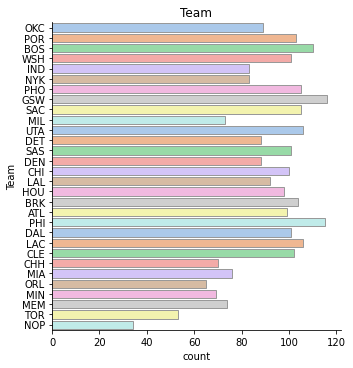

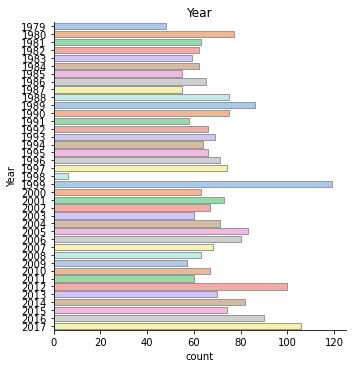

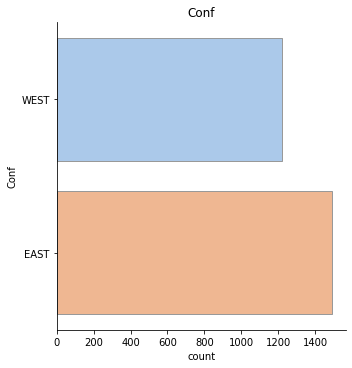

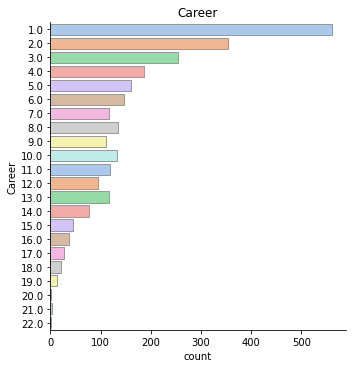

In [94]:
for col in cats:
    sns.catplot(y=col, kind="count",
                palette="pastel", edgecolor=".6",
                data=train)
    plt.title(col)
    plt.show()
    print()

# <span style="color:blue">Correlation</span>

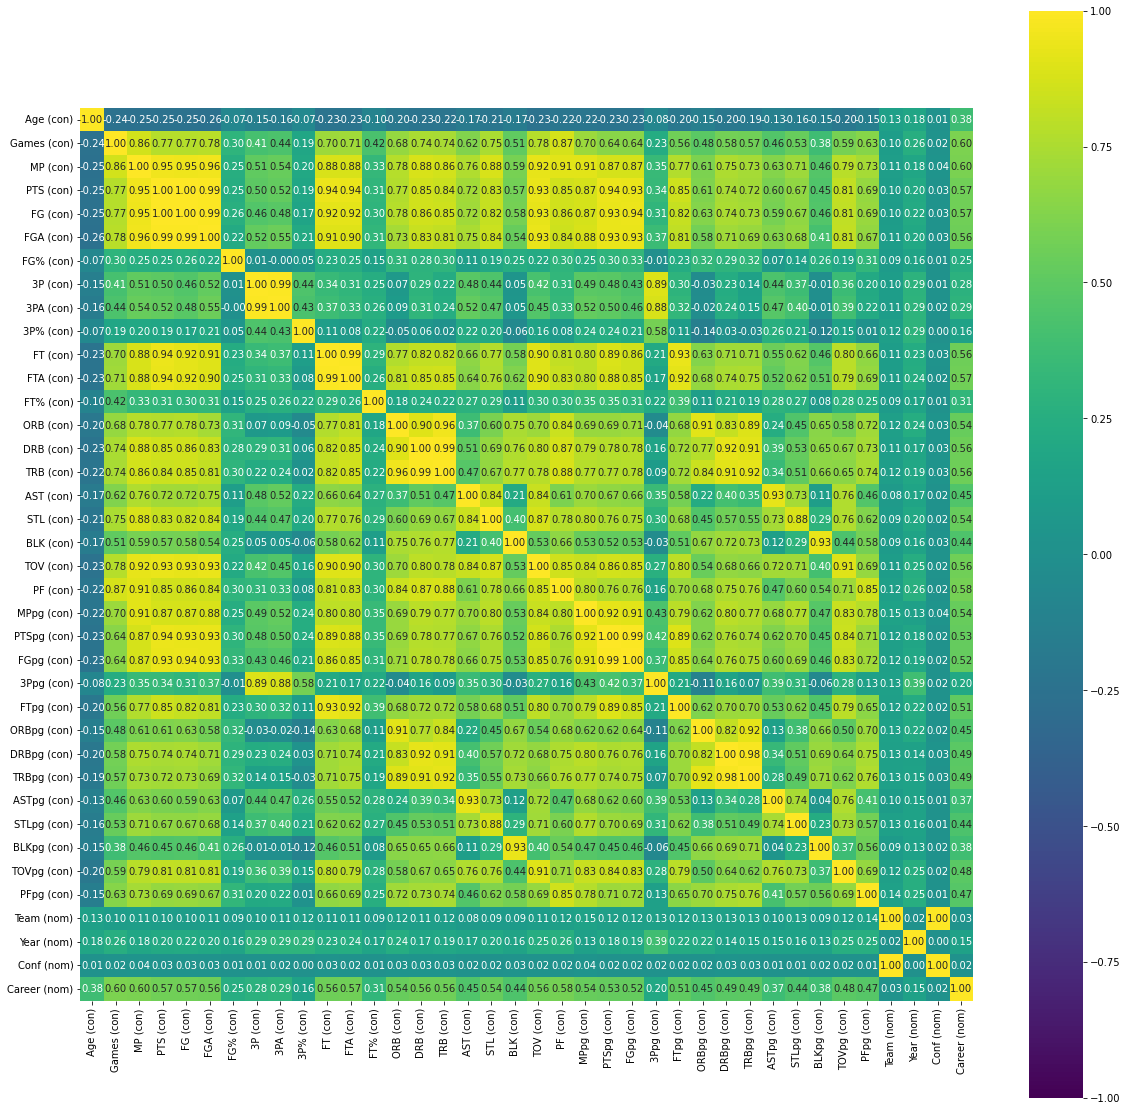

{'corr':               Age (con)  Games (con)  MP (con)  PTS (con)  FG (con)  \
 Age (con)      1.000000    -0.244014 -0.252361  -0.247392 -0.245305   
 Games (con)   -0.244014     1.000000  0.863095   0.773668  0.774239   
 MP (con)      -0.252361     0.863095  1.000000   0.953446  0.950770   
 PTS (con)     -0.247392     0.773668  0.953446   1.000000  0.995628   
 FG (con)      -0.245305     0.774239  0.950770   0.995628  1.000000   
 FGA (con)     -0.255137     0.782519  0.956250   0.990799  0.990908   
 FG% (con)     -0.072449     0.296921  0.252722   0.248325  0.258251   
 3P (con)      -0.146905     0.409946  0.511305   0.496471  0.457593   
 3PA (con)     -0.164646     0.436554  0.538147   0.519284  0.480936   
 3P% (con)     -0.067676     0.185178  0.195819   0.185921  0.170004   
 FT (con)      -0.228325     0.704818  0.878960   0.941256  0.917555   
 FTA (con)     -0.234084     0.713969  0.880237   0.935943  0.917076   
 FT% (con)     -0.104136     0.422259  0.331921   0.3081

In [95]:
fig,ax = plt.subplots(figsize=(20,20))
associations(dataset=data[nums+cats] ,numerical_columns=nums,nan_replace_value='replace',cmap='viridis',mark_columns=True,ax=ax)
#fig.savefig("Num Cat kaggle house predictions.png")

In [123]:
cats

['Team', 'Year', 'Conf', 'Career']

In [124]:
df_dict = Dict_df(df=train,predictors=nums+['Team', 'Year', 'Conf'])

In [125]:
df_dict

3P    3P%    3PA  3Ppg    AST  ASTpg   Age   BLK  BLKpg  Conf=EAST  \
0      0.0  0.000    0.0  0.00   28.0    0.4  22.0  54.0   0.81        0.0   
1      8.0  0.421   19.0  0.50   31.0    1.9  23.0   2.0   0.12        0.0   
2     58.0  0.406  143.0  0.71  370.0    4.5  23.0  53.0   0.65        1.0   
3      0.0  0.000    0.0  0.00    2.0    0.2  23.0   2.0   0.15        1.0   
4      2.0  0.400    5.0  0.02  252.0    3.1  22.0  48.0   0.59        1.0   
...    ...    ...    ...   ...    ...    ...   ...   ...    ...        ...   
2704   1.0  0.200    5.0  0.33    0.0    0.0  24.0   0.0   0.00        1.0   
2705   2.0  0.400    5.0  0.09    3.0    0.1  21.0   1.0   0.05        1.0   
2706  27.0  0.429   63.0  1.80   10.0    0.7  27.0   8.0   0.53        0.0   
2707  12.0  0.324   37.0  0.36   16.0    0.5  22.0   5.0   0.15        1.0   
2708   0.0  0.000    0.0  0.00    5.0    0.2  21.0  13.0   0.41        1.0   

      Conf=WEST    DRB  DRBpg     FG    FG%     FGA  FGpg     FT    FT%  \
0           1.0  126.0   1.88  122.0  0.450   271.0  1.82   68.0  0.673   
1           1.0   16.0   1.00   72.0  0.493   146.0  4.50   28.0  0.718   
2           0.0  636.0   7.76  693.0  0.474  1463.0  8.45  301.0  0.836   
3           0.0   20.0   1.54   24.0  0.462    52.0  1.85    8.0  0.615   
4           0.0  154.0   1.88  275.0  0.452   609.0  3.35  136.0  0.782   
...         ...    ...    ...    ...    ...     ...   ...    ...    ...   
2704        0.0    1.0   0.33    2.0  0.333     6.0  0.67    0.0  0.000   
2705        0.0    8.0   0.36    9.0  0.563    16.0  0.41    1.0  0.500   
2706        1.0   29.0   1.93   38.0  0.469    81.0  2.53    2.0  0.500   
2707        0.0   35.0   1.06   26.0  0.426    61.0  0.79   15.0  0.682   
2708        0.0   36.0   1.12   49.0  0.731    67.0  1.53   21.0  0.724   

        FTA  FTpg  Games      MP   MPpg    ORB  ORBpg     PF  PFpg     PTS  \
0     101.0  1.01   67.0   726.0  10.84   71.0   1.06  116.0  1.73   312.0   
1      39.0  1.75   16.0   235.0  14.69   13.0   0.81   26.0  1.62   180.0   
2     360.0  3.67   82.0  2955.0  36.04  216.0   2.63  279.0  3.40  1745.0   
3      13.0  0.62   13.0   125.0   9.62   19.0   1.46   25.0  1.92    56.0   
4     174.0  1.66   82.0  2027.0  24.72   69.0   0.84  194.0  2.37   688.0   
...     ...   ...    ...     ...    ...    ...    ...    ...   ...     ...   
2704    0.0  0.00    3.0    11.0   3.67    0.0   0.00    1.0  0.33     5.0   
2705    2.0  0.05   22.0    71.0   3.23    2.0   0.09    7.0  0.32    21.0   
2706    4.0  0.13   15.0   274.0  18.27    3.0   0.20   34.0  2.27   105.0   
2707   22.0  0.45   33.0   235.0   7.12   17.0   0.52   23.0  0.70    79.0   
2708   29.0  0.66   32.0   214.0   6.69   24.0   0.75   30.0  0.94   119.0   

      PTSpg    STL  STLpg    TOV  TOVpg    TRB  TRBpg  Team=ATL  Team=BOS  \
0       4.7   21.0   0.31   79.0   1.18  197.0    2.9       0.0       0.0   
1      11.3   14.0   0.88   20.0   1.25   29.0    1.8       0.0       0.0   
2      21.3  143.0   1.74  263.0   3.21  852.0   10.4       0.0       1.0   
3       4.3    4.0   0.31    8.0   0.62   39.0    3.0       0.0       0.0   
4       8.4  211.0   2.57  166.0   2.02  223.0    2.7       0.0       0.0   
...     ...    ...    ...    ...    ...    ...    ...       ...       ...   
2704    1.7    0.0   0.00    1.0   0.33    1.0    0.3       0.0       0.0   
2705    1.0    3.0   0.14    4.0   0.18   10.0    0.5       0.0       0.0   
2706    7.0    5.0   0.33    8.0   0.53   32.0    2.1       0.0       0.0   
2707    2.4    4.0   0.12   12.0   0.36   52.0    1.6       0.0       1.0   
2708    3.7    2.0   0.06   11.0   0.34   60.0    1.9       0.0       0.0   

      Team=BRK  Team=CHH  Team=CHI  Team=CLE  Team=DAL  Team=DEN  Team=DET  \
0          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2          0.0       0.0       0.0       0.0       0.0       0.0       0.0

# <span style="color:blue"> MUTUAL INFORMATION SCORE</span>

## career

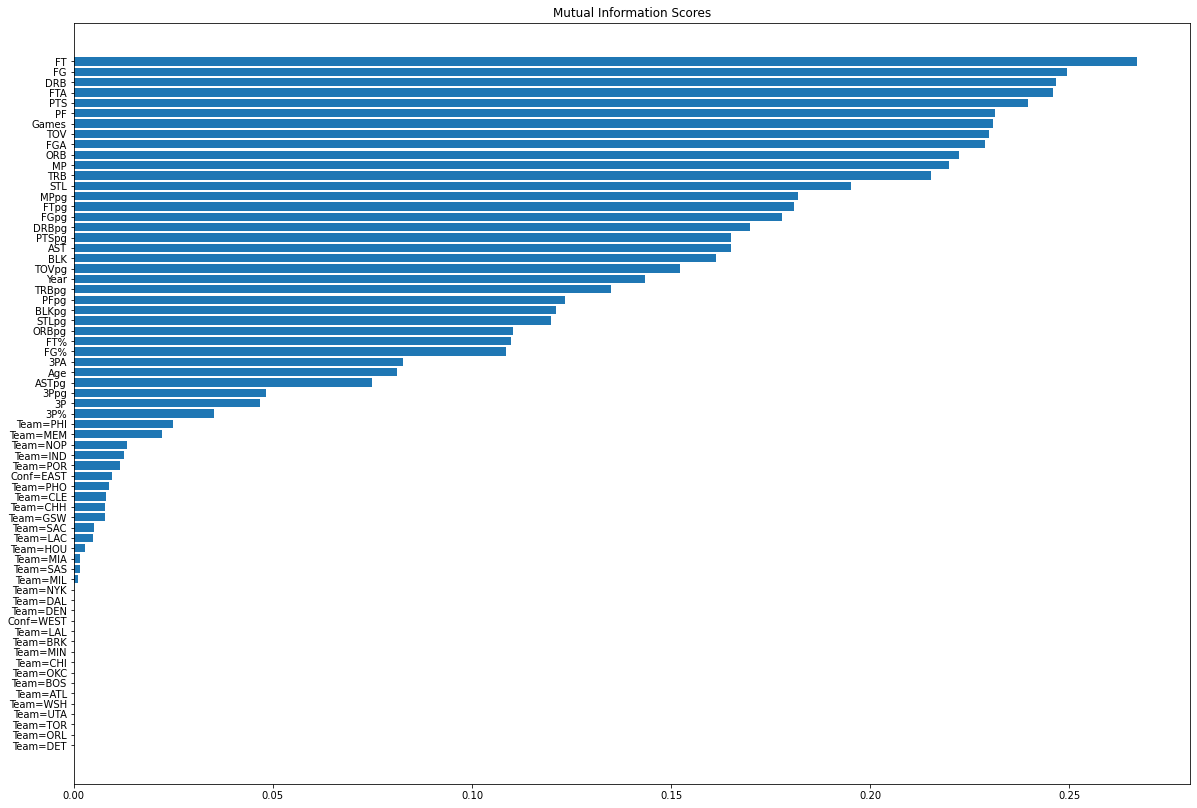

In [126]:
mi_scores = make_mi_scores_Classifier(X_train=df_dict, y_train=train.Career)
plot_mi_scores(scores=mi_scores)

## target>=2

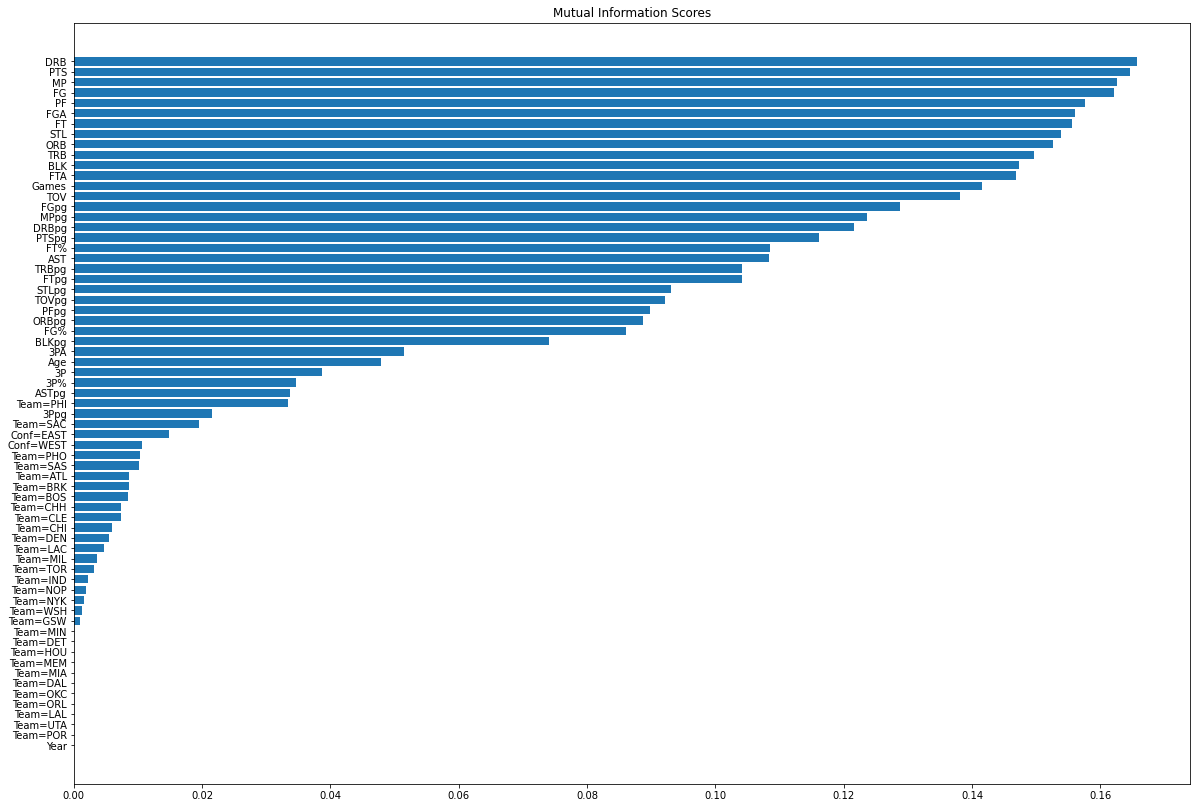

In [134]:
mi_scores2 = make_mi_scores_Classifier(X_train=df_dict, y_train=train['target>=2'])
plot_mi_scores(scores=mi_scores2)

# target>=4

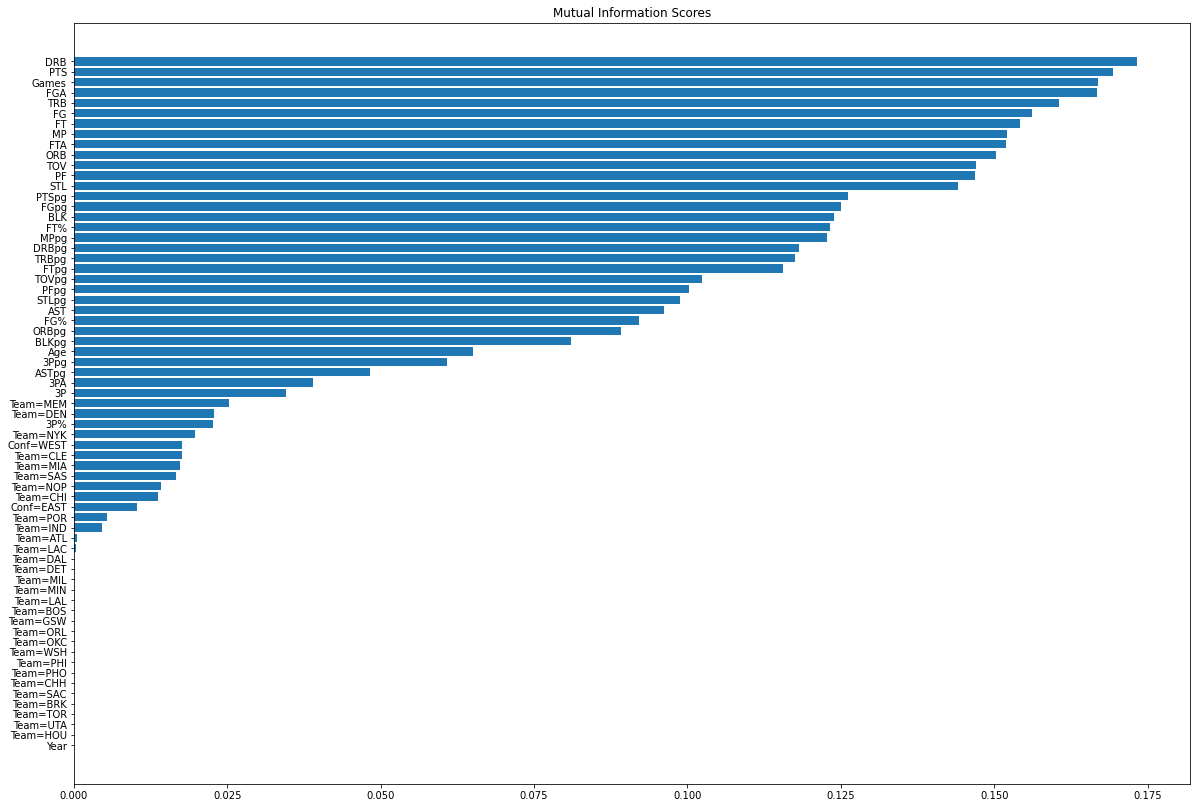

In [129]:
mi_scores4 = make_mi_scores_Classifier(X_train=df_dict, y_train=train['target>=4'])
plot_mi_scores(scores=mi_scores4)

# target>=5

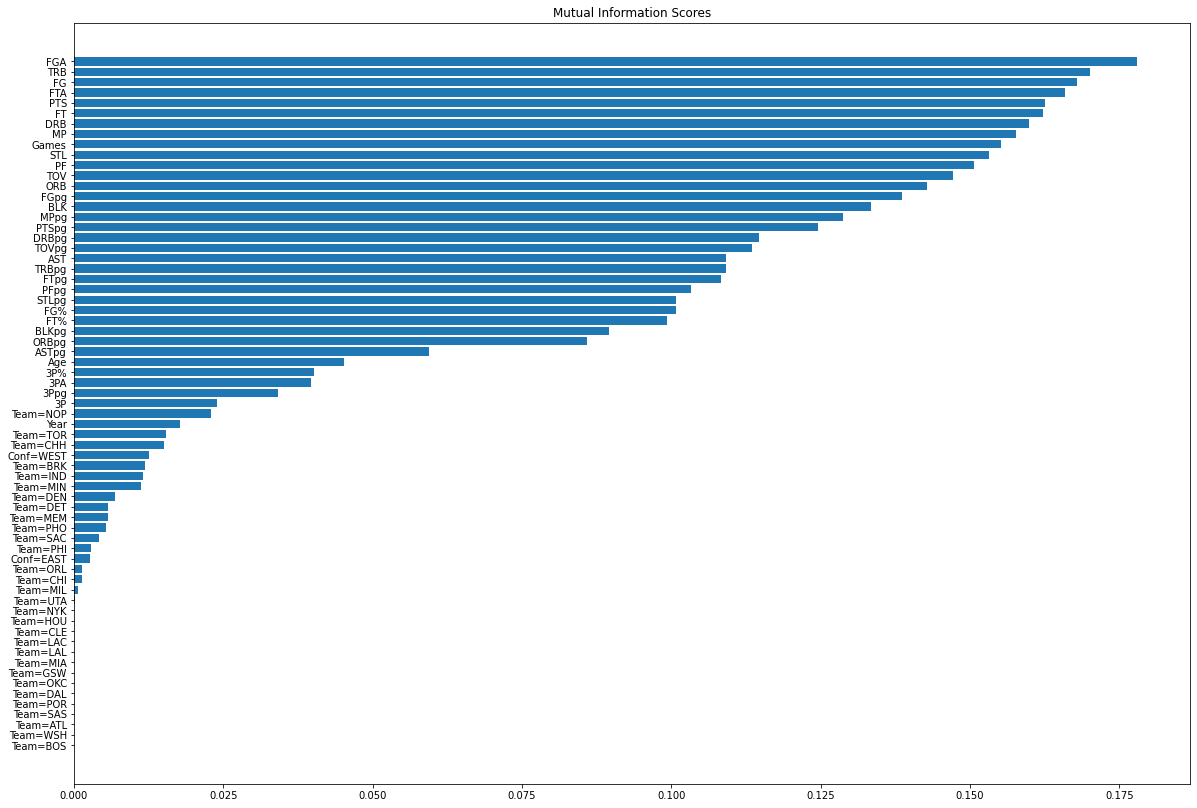

In [128]:
mi_scores5 = make_mi_scores_Classifier(X_train=df_dict, y_train=train['target>=5'])
plot_mi_scores(scores=mi_scores5)

In [133]:
mi_scores

FGA          0.169771
FG           0.168952
PF           0.166716
DRB          0.163615
PTS          0.163201
               ...   
Team=MIL     0.000000
Team=MIA     0.000000
Team=MEM     0.000000
Team=DAL     0.000000
Conf=WEST    0.000000
Name: MI Scores, Length: 67, dtype: float64

# <span style="color:blue"> MUTUAL INFORMATION SCORE across all targets</span>

In [142]:
scores_df = pd.concat([mi_scores,mi_scores5,mi_scores4,mi_scores2], axis=1)#.reset_index()
scores_df.columns = ['all','5','4','2']
scores_df.sort_values(by=['5'],
                                ascending=False,
                                inplace=True)  
display(scores_df.T.style.background_gradient(cmap='summer_r'))

In [50]:
cats

['Team', 'Year', 'Conf', 'Career']

In [148]:
top_k = scores_df.T.columns[:15].to_list()

In [149]:
top_k

['FGA',
 'TRB',
 'FG',
 'FTA',
 'PTS',
 'FT',
 'DRB',
 'MP',
 'Games',
 'STL',
 'PF',
 'TOV',
 'ORB',
 'FGpg',
 'BLK']

# <span style="color:blue"> PAIRPLOTS </span>

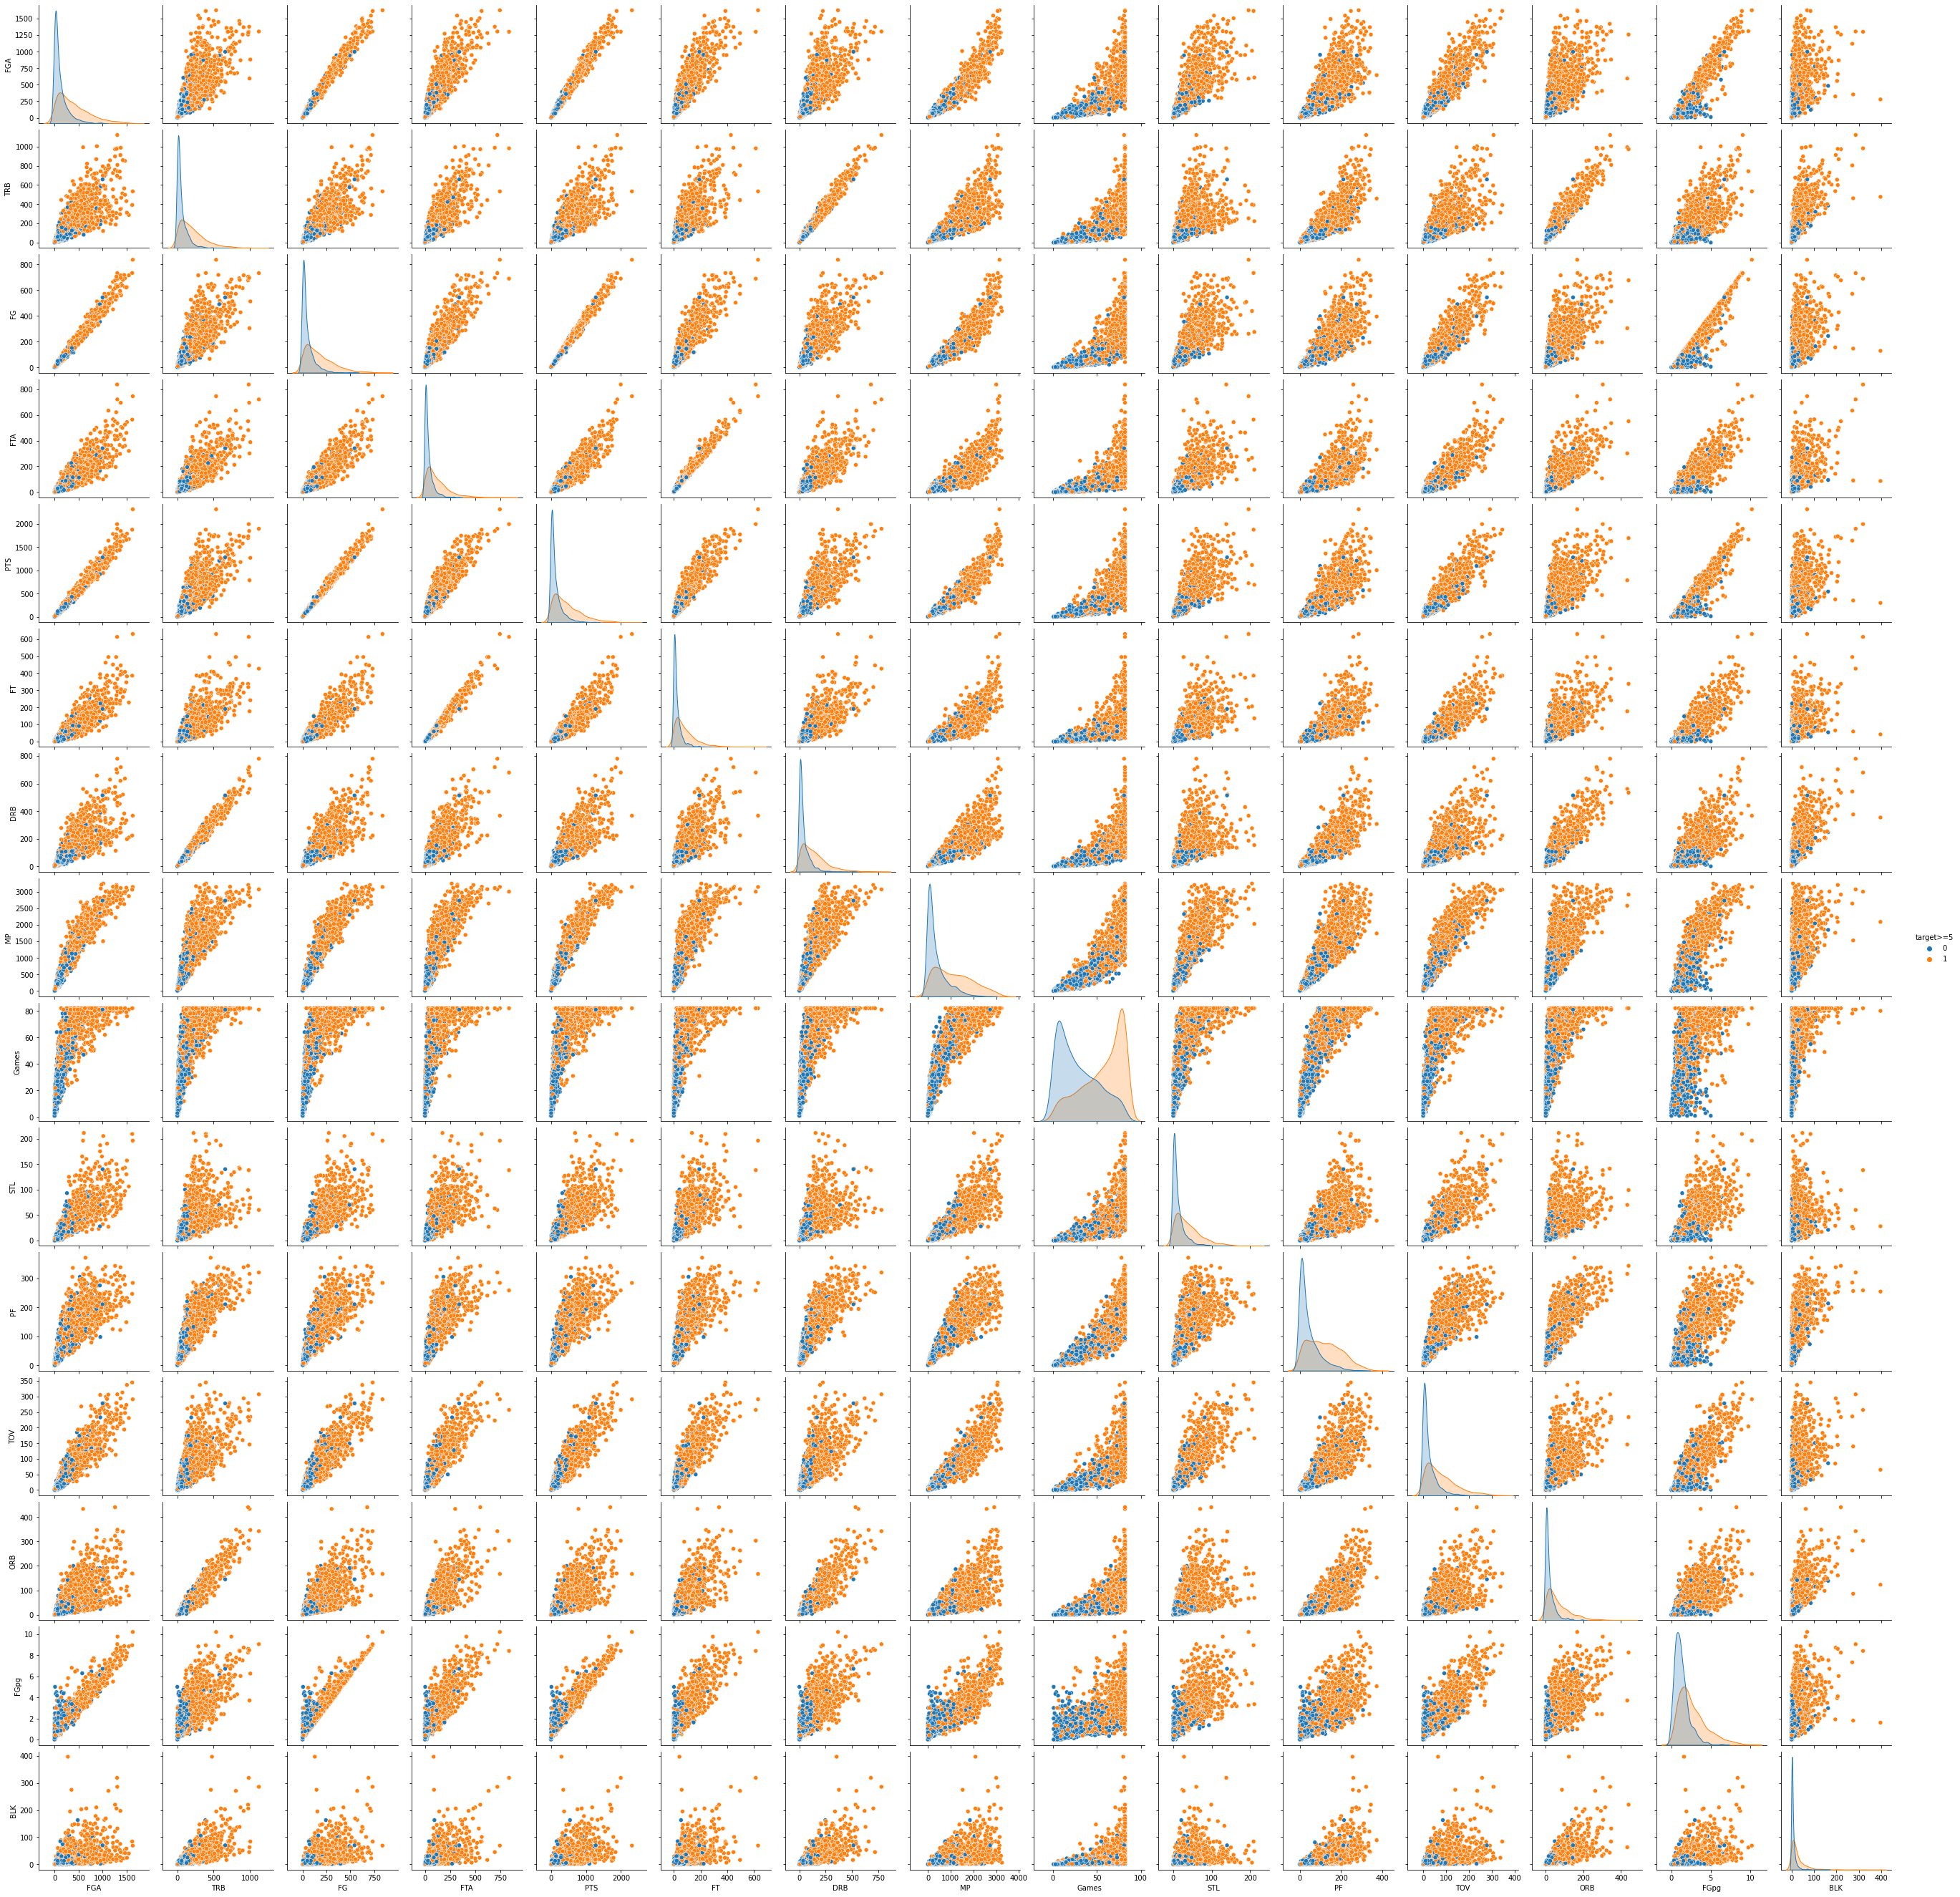

In [150]:
sns.pairplot(data=train[top_k+['target>=5']],hue='target>=5')

# <span style="color:blue"> SKEWNESS </span>

In [57]:
skewness(train)

# <span style="color:blue"> global termination rate and risk ratio</span> 

## target>=2

In [96]:
#target>=2
risk_ratio(train,columns=cats+targets,target='target>=2')

Team

 global departure = 34.0 %



Year

 global departure = 34.0 %



Conf

 global departure = 34.0 %



Career

 global departure = 34.0 %



target>=2

 global departure = 34.0 %



target>=3

 global departure = 34.0 %



target>=4

 global departure = 34.0 %



target>=5

 global departure = 34.0 %


## target>=4

In [98]:
#target>=4
risk_ratio(train,columns=cats+targets,target='target>=4')

Team

 global departure = 43.0 %



Year

 global departure = 43.0 %



Conf

 global departure = 43.0 %



Career

 global departure = 43.0 %



target>=2

 global departure = 43.0 %



target>=3

 global departure = 43.0 %



target>=4

 global departure = 43.0 %



target>=5

 global departure = 43.0 %


In [152]:
## target>=5

In [99]:
#target>=5
risk_ratio(train,columns=cats+targets,target='target>=5')

Team

 global departure = 50.0 %



Year

 global departure = 50.0 %



Conf

 global departure = 50.0 %



Career

 global departure = 50.0 %



target>=2

 global departure = 50.0 %



target>=3

 global departure = 50.0 %



target>=4

 global departure = 50.0 %



target>=5

 global departure = 50.0 %


In [103]:
cats

['Team', 'Year', 'Conf', 'Career']

# <span style="color:blue"> scatter plots </span> 

Age
Correlation with Target  :  -0.35084022050490304


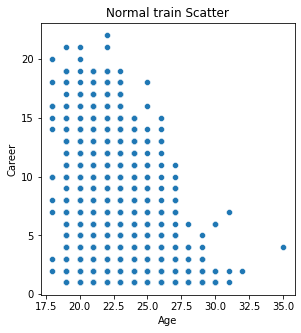

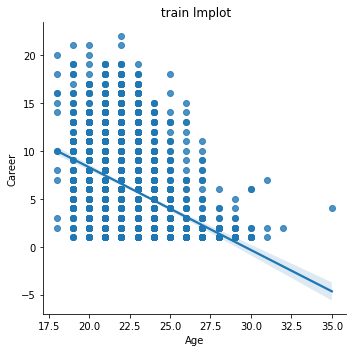



Games
Correlation with Target  :  0.5475972642299461


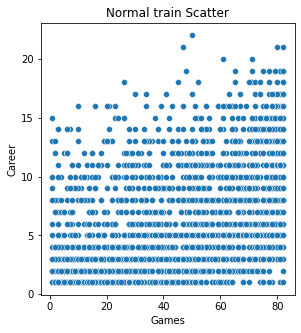

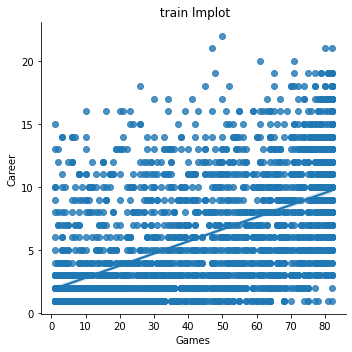



MP
Correlation with Target  :  0.5797985990159404


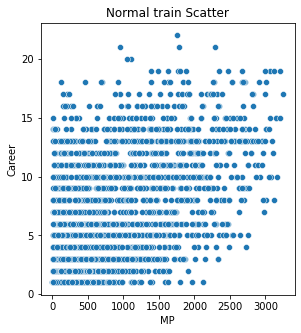

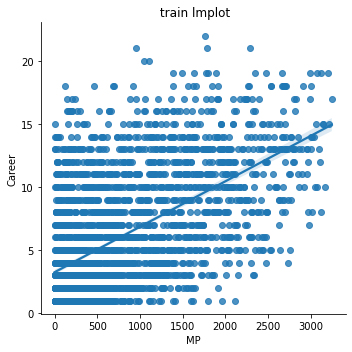



PTS
Correlation with Target  :  0.5552048736160876


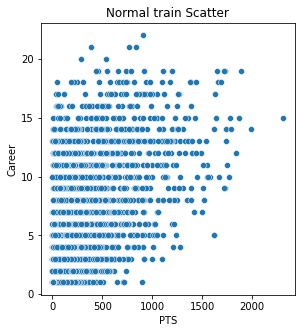

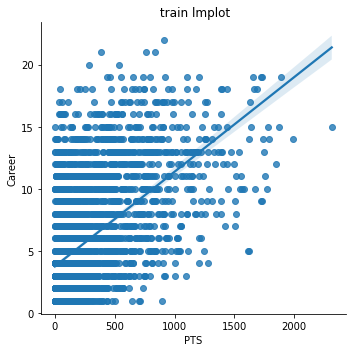



FG
Correlation with Target  :  0.5521883603919591


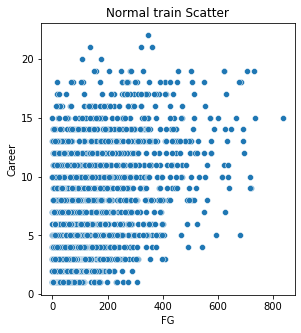

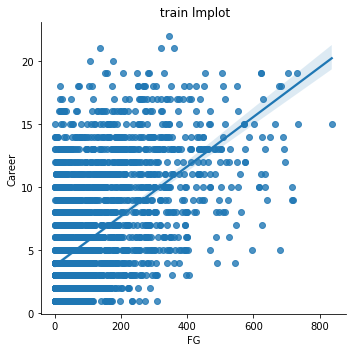



FGA
Correlation with Target  :  0.5468485383690325


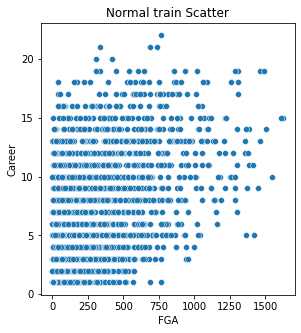

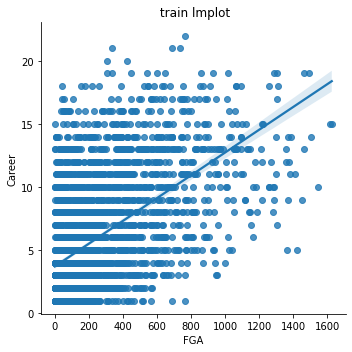



FG%
Correlation with Target  :  0.20486023107828133


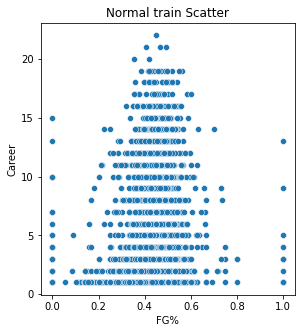

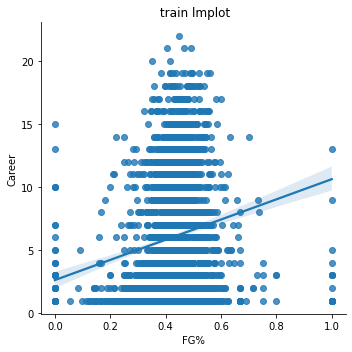



3P
Correlation with Target  :  0.2198632432660377


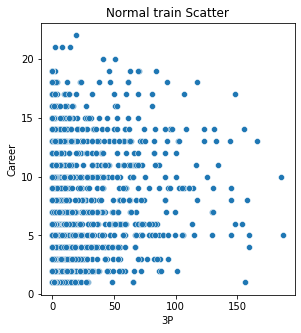

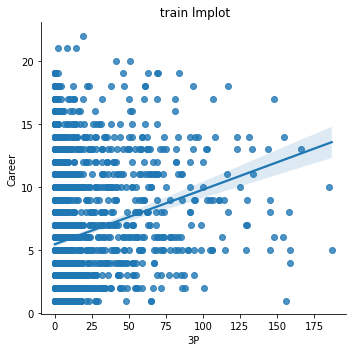



3PA
Correlation with Target  :  0.23339470515136476


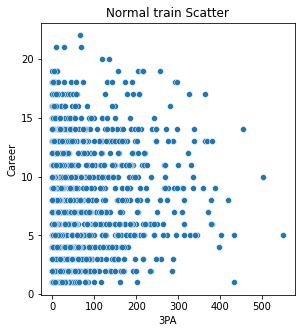

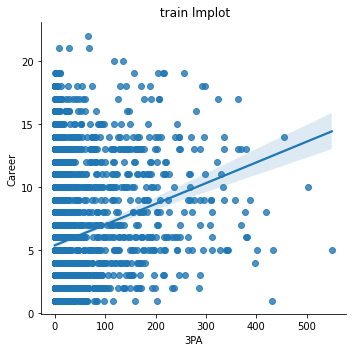



3P%
Correlation with Target  :  0.11465785475835572


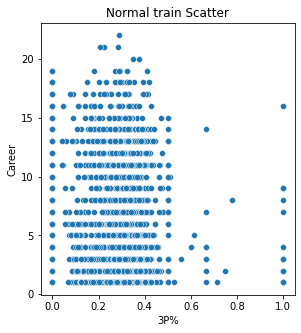

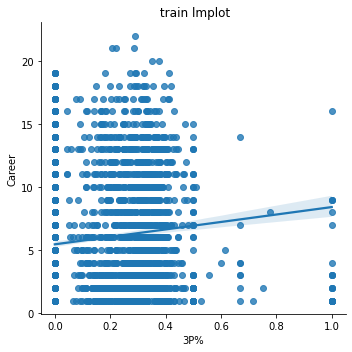



FT
Correlation with Target  :  0.5412500594846652


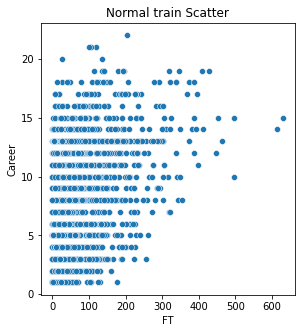

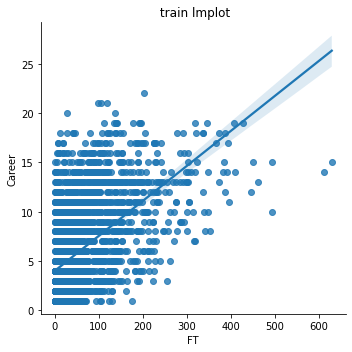



FTA
Correlation with Target  :  0.5497512146035166


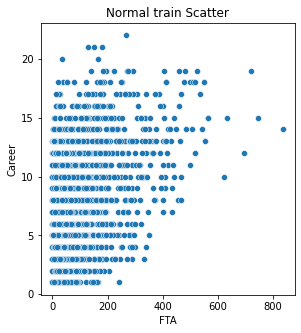

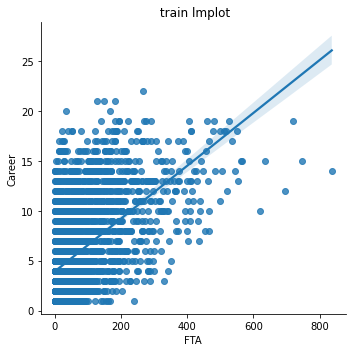



FT%
Correlation with Target  :  0.23877804794778104


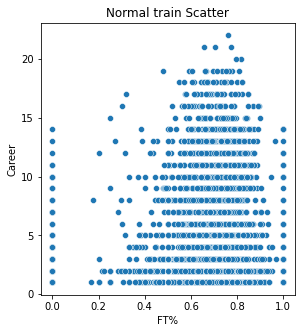

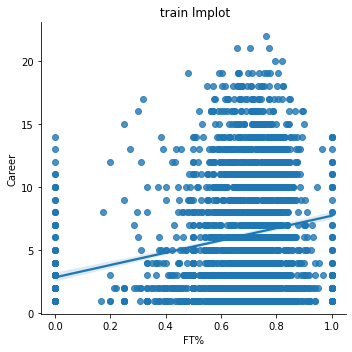



ORB
Correlation with Target  :  0.5177545809020165


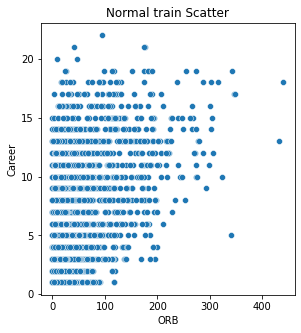

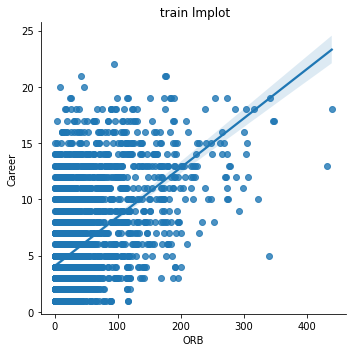



DRB
Correlation with Target  :  0.5323621636277247


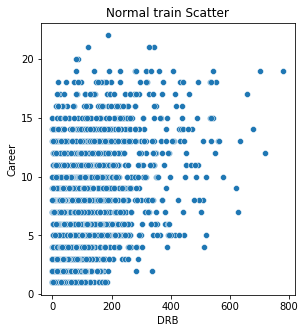

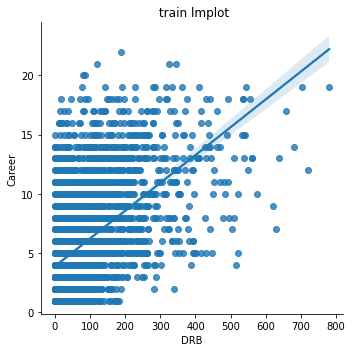



TRB
Correlation with Target  :  0.5391249504499667


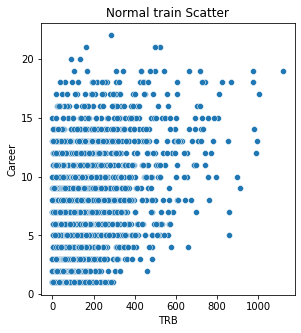

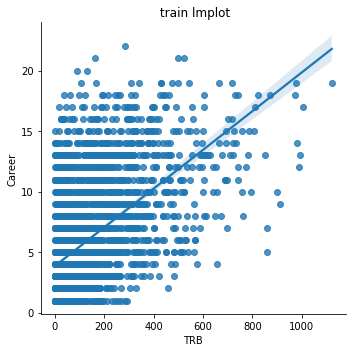



AST
Correlation with Target  :  0.42906153064564084


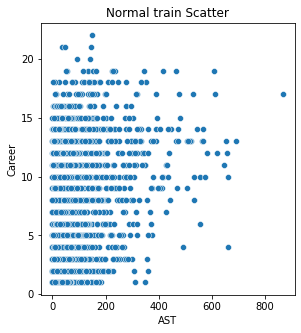

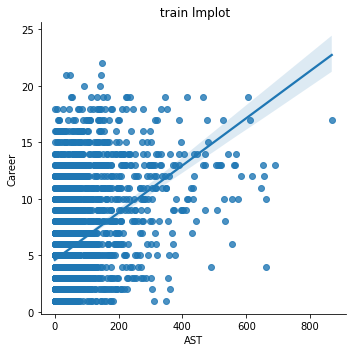



STL
Correlation with Target  :  0.5219770658383258


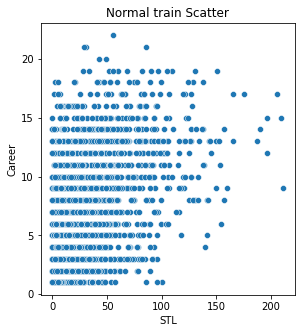

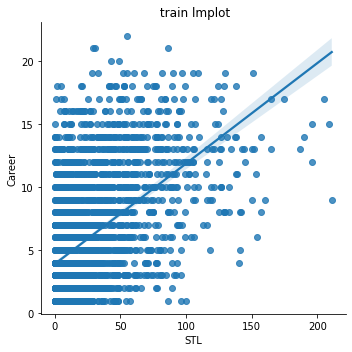



BLK
Correlation with Target  :  0.41801243653908754


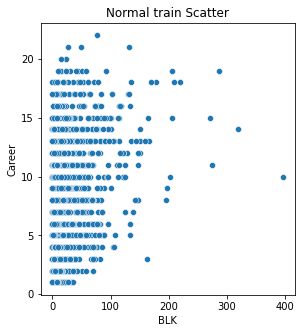

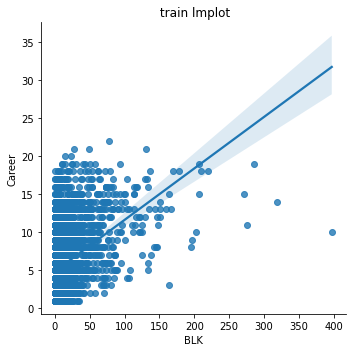



TOV
Correlation with Target  :  0.5459484329932429


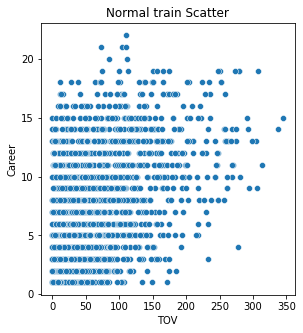

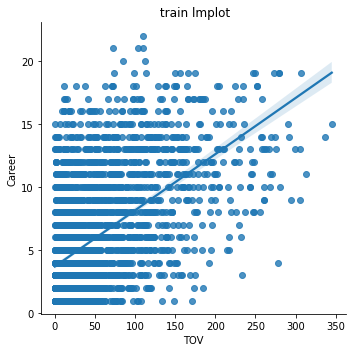



PF
Correlation with Target  :  0.5610697296035086


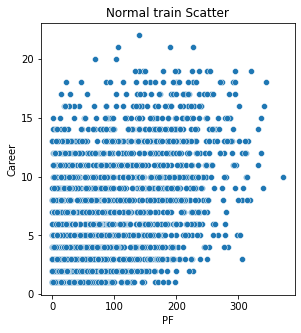

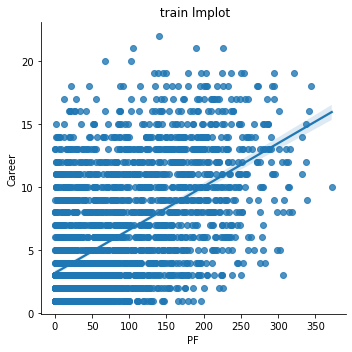



MPpg
Correlation with Target  :  0.5282676909869057


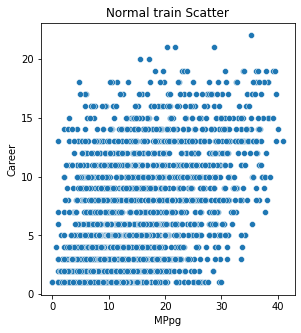

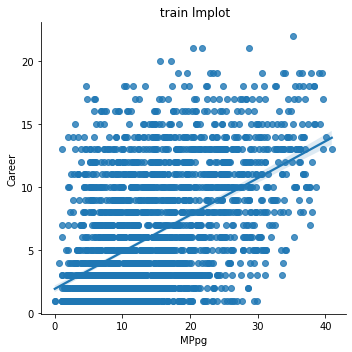



PTSpg
Correlation with Target  :  0.5178739697771495


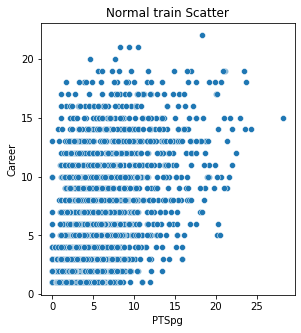

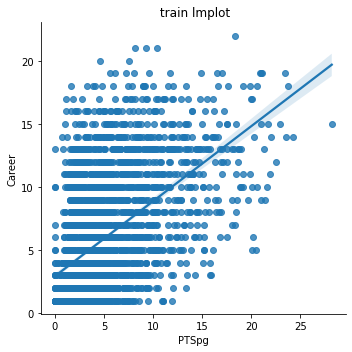



FGpg
Correlation with Target  :  0.513232450770039


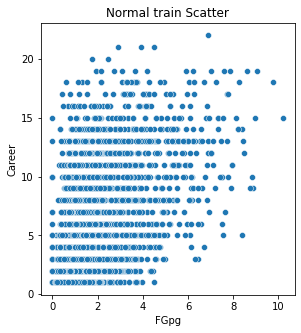

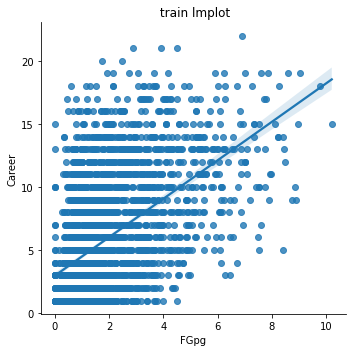



3Ppg
Correlation with Target  :  0.13950940674370438


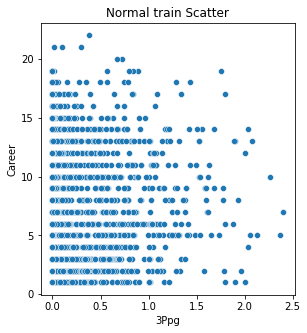

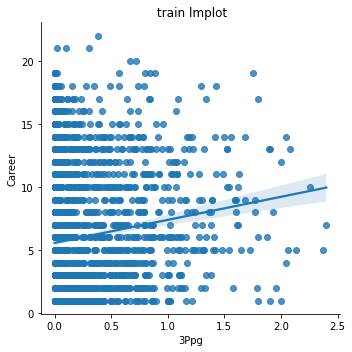



FTpg
Correlation with Target  :  0.49377997624379083


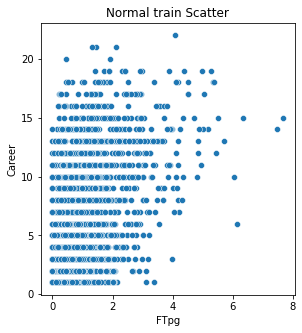

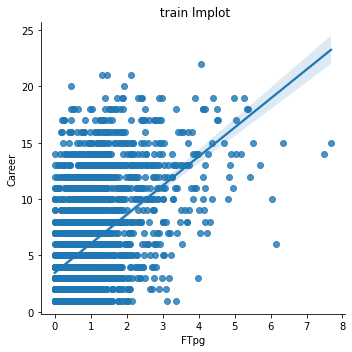



ORBpg
Correlation with Target  :  0.43119684332315683


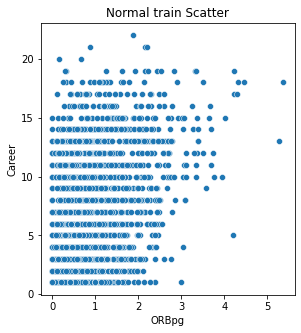

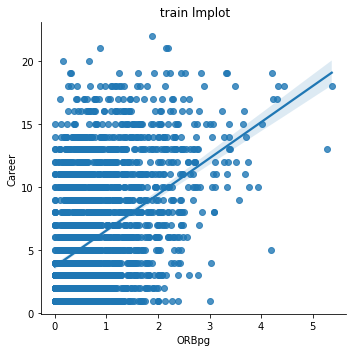



DRBpg
Correlation with Target  :  0.47093262790485846


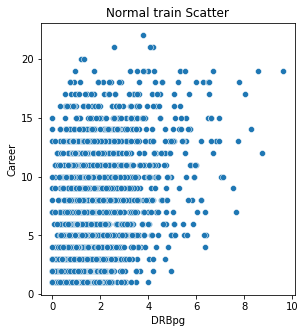

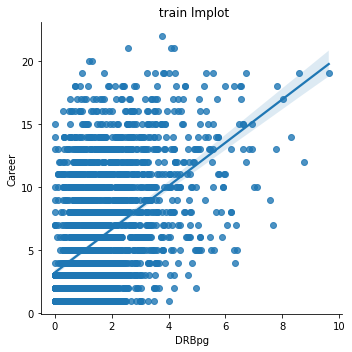



TRBpg
Correlation with Target  :  0.4766606691190308


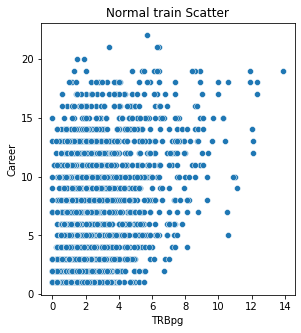

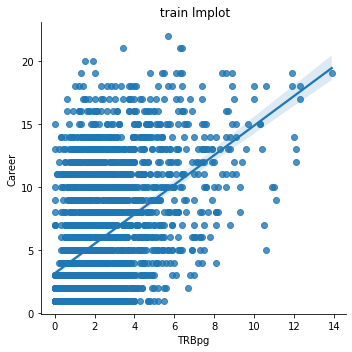



ASTpg
Correlation with Target  :  0.35571387313832653


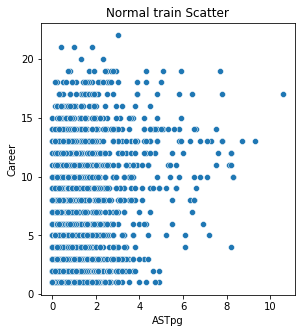

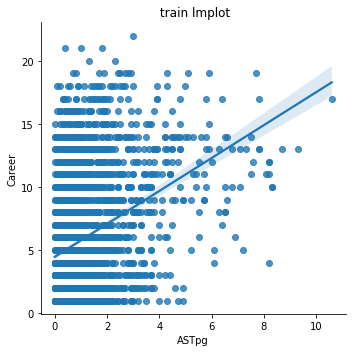



STLpg
Correlation with Target  :  0.4313151918136017


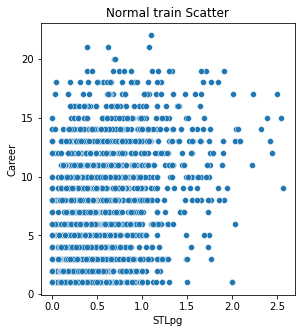

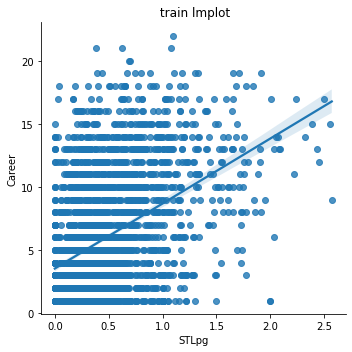



BLKpg
Correlation with Target  :  0.36177512033555836


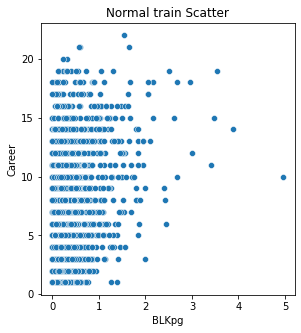

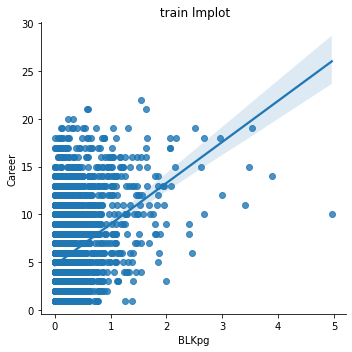



TOVpg
Correlation with Target  :  0.4677143946570081


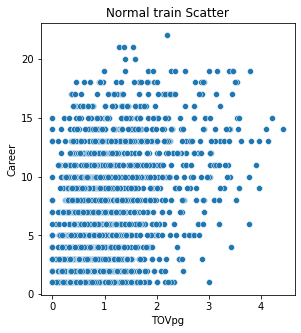

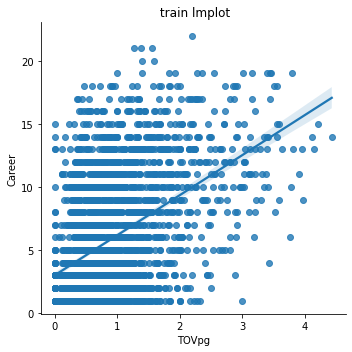



PFpg
Correlation with Target  :  0.45398086939285337


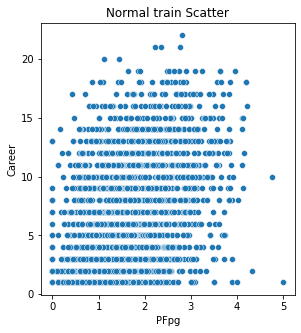

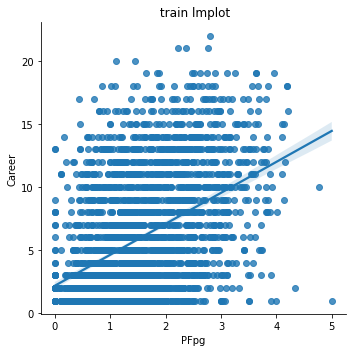



Year
Correlation with Target  :  -0.10237177073328532


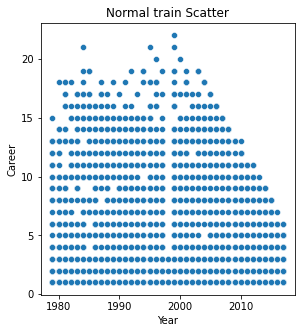

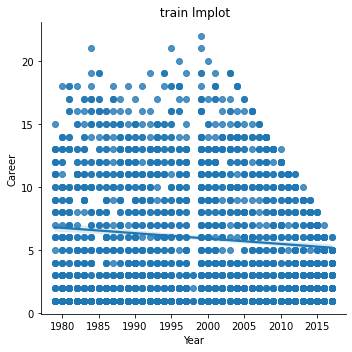



Career
Correlation with Target  :  0.9999999999999998


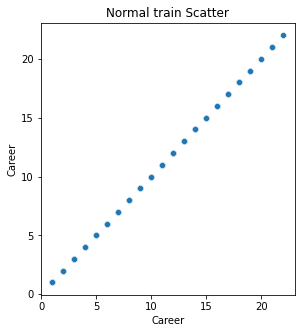

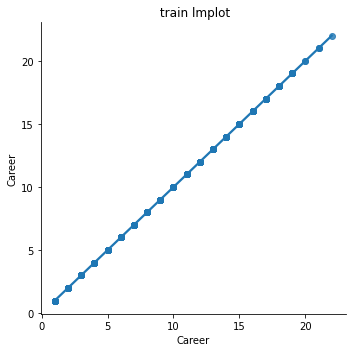

In [117]:
plot_lim_and_reg_plot(df=train,cols=nums+['Year','Career'],target_col='Career',fill_na=0,hue=None)